## Import the libraries

We'll use `pandas` to load and manipulate the data. Other libraries will be imported in the relevant sections.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.impute import KNNImputer


## Exploratory Data Analysis
In this step, one should load the data and analyze it. However, I'll load the data and do minimal analysis. You are encouraged to do thorough analysis!

Let's load the data using `pandas` and have a look at the generated `DataFrame`.

In [2]:
dataset_path = '/kaggle/input/diabetes-readmission-prediction-i43/'

df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

print("The shape of the dataset is {}.\n\n".format(df.shape))

df

The shape of the dataset is (71236, 50).




encounter_id  patient_nbr       race  gender      age weight  \
0         197920182    110382426  Caucasian  Female  [80-90)      ?   
1          30870324      1276911  Caucasian    Male  [70-80)      ?   
2         126616944     92115693  Caucasian  Female  [70-80)      ?   
3         303646118     32010471  Caucasian    Male  [50-60)      ?   
4         109444026      2402271  Caucasian    Male  [40-50)      ?   
...             ...          ...        ...     ...      ...    ...   
71231     242809818     39060180  Caucasian    Male  [40-50)      ?   
71232     406694150     43796898  Caucasian    Male  [70-80)      ?   
71233      83519910     15749334  Caucasian    Male  [60-70)      ?   
71234     227511798     67898304  Caucasian  Female  [60-70)      ?   
71235     148433280     43720650  Caucasian    Male  [70-80)      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \
0                      3                         1                    7   
1                      3                         5                    1   
2                      3                         3                    1   
3                      6                         1                    7   
4                      1                         1                    6   
...                  ...                       ...                  ...   
71231                  1                         2                    7   
71232                  3                         1                    1   
71233                  1                         1                    7   
71234                  1                         1                    7   
71235                  3                         1                    1   

       time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                     5  ...          No      No                   No   
1                     3  ...          No      No                   No   
2                     8  ...          No      Up                   No   
3                     7  ...          No      No                   No   
4                     2  ...          No  Steady                   No   
...                 ...  ...         ...     ...                  ...   
71231                 1  ...          No  Steady                   No   
71232                 2  ...          No      No                   No   
71233                 3  ...          No  Steady                   No   
71234                 1  ...          No      No                   No   
71235                 4  ...          No      No                   No   

       glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                       No                        No                       No   
1                       No                        No                       No   
2                       No                        No                       No   
3                       No                        No                       No   
4                       No                        No                       No   
...                    ...                       ...                      ...   
71231                   No                        No                       No   
71232                   No                        No                       No   
71233                   No                        No                       No   
71234                   No                        No                       No   
71235                   No                        No                       No   

       metformin-pioglitazone  change diabetesMed readmitted  
0                          No      Ch         Yes        >30  
1                          No      No         Yes         NO  
2                          No      Ch         Yes         NO  
3                          No      No          No        >30  
4                          No      No         Yes         NO  
...                      

In [3]:
test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
test_df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0     109962834     23779836  AfricanAmerican  Female  [60-70)      ?   
1     240829854     32387580        Caucasian    Male  [80-90)      ?   
2      44942994     19436418                ?  Female  [20-30)      ?   
3     302469824    142233539  AfricanAmerican  Female  [60-70)      ?   
4     172075704     79818876        Caucasian    Male  [60-70)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  2                        22                    1   
1                  2                        13                    1   
2                  2                        18                    4   
3                  1                        22                    7   
4                  2                        22                    1   

   time_in_hospital  ... examide citoglipton  insulin  glyburide-metformin  \
0                 4  ...      No          No   Steady                   No   
1                 3  ...      No          No   Steady                   No   
2                 4  ...      No          No       No                   No   
3                 7  ...      No          No   Steady                   No   
4                 7  ...      No          No       No                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone change diabetesMed  
0                      No     No         Yes  
1                      No     Ch         Yes  
2                      No     No          No  
3                      No     No         Yes  
4                      No     No         Yes  

[5 rows x 49 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71236 non-null  int64 
 1   patient_nbr               71236 non-null  int64 
 2   race                      71236 non-null  object
 3   gender                    71236 non-null  object
 4   age                       71236 non-null  object
 5   weight                    71236 non-null  object
 6   admission_type_id         71236 non-null  int64 
 7   discharge_disposition_id  71236 non-null  int64 
 8   admission_source_id       71236 non-null  int64 
 9   time_in_hospital          71236 non-null  int64 
 10  payer_code                71236 non-null  object
 11  medical_specialty         71236 non-null  object
 12  num_lab_procedures        71236 non-null  int64 
 13  num_procedures            71236 non-null  int64 
 14  num_medications       

In [5]:
df.isnull().sum().sum()

0

In [6]:
df[df.duplicated()]

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 50 columns]

In [7]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [8]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

encounter_id: Number of unique values 71236
patient_nbr: Number of unique values 54085
race: Number of unique values 6
gender: Number of unique values 3
age: Number of unique values 10
weight: Number of unique values 10
admission_type_id: Number of unique values 8
discharge_disposition_id: Number of unique values 26
admission_source_id: Number of unique values 16
time_in_hospital: Number of unique values 14
payer_code: Number of unique values 18
medical_specialty: Number of unique values 71
num_lab_procedures: Number of unique values 112
num_procedures: Number of unique values 7
num_medications: Number of unique values 75
number_outpatient: Number of unique values 35
number_emergency: Number of unique values 28
number_inpatient: Number of unique values 21
diag_1: Number of unique values 684
diag_2: Number of unique values 701
diag_3: Number of unique values 750
number_diagnoses: Number of unique values 16
max_glu_serum: Number of unique values 4
A1Cresult: Number of unique values 4
met

In [9]:
numeric_columns = list(df.select_dtypes(include='number').columns)
categorical_columns = list(df.select_dtypes(include="object").columns)

In [10]:
df[numeric_columns].describe()

encounter_id   patient_nbr  admission_type_id  \
count  7.123600e+04  7.123600e+04       71236.000000   
mean   1.651251e+08  5.424765e+07           2.024679   
std    1.028815e+08  3.873555e+07           1.446816   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.475544e+07  2.340903e+07           1.000000   
50%    1.524368e+08  4.515530e+07           1.000000   
75%    2.303751e+08  8.740911e+07           3.000000   
max    4.438672e+08  1.893511e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count              71236.000000         71236.000000      71236.000000   
mean                   3.709824             5.763420          4.397861   
std                    5.267355             4.076464          2.982953   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    3.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count        71236.000000    71236.000000     71236.000000       71236.000000   
mean            43.099570        1.337315        16.017014           0.367553   
std             19.655114        1.705764         8.102990           1.244195   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          40.000000   

       number_emergency  number_inpatient  number_diagnoses  
count      71236.000000      71236.000000      71236.000000  
mean           0.195645          0.632124          7.418974  
std            0.899766          1.252125          1.931462  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [11]:
df[categorical_columns].describe()

race  gender      age weight payer_code medical_specialty diag_1  \
count       71236   71236    71236  71236      71236             71236  71236   
unique          6       3       10     10         18                71    684   
top     Caucasian  Female  [70-80)      ?          ?                 ?    428   
freq        53269   38298    18277  69027      28218             34987   4825   

       diag_2 diag_3 max_glu_serum  ... citoglipton insulin  \
count   71236  71236         71236  ...       71236   71236   
unique    701    750             4  ...           1       4   
top       428    250          None  ...          No      No   
freq     4704   8158         67452  ...       71236   33123   

       glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
count                71236               71236                    71236   
unique                   4                   2                        2   
top                     No                  No                       No   
freq                 70720               71227                    71235   

       metformin-rosiglitazone metformin-pioglitazone change diabetesMed  \
count                    71236                  71236  71236       71236   
unique                       2                      2      2           2   
top                         No                     No     No         Yes   
freq                     71235                  71235  38359       54994   

       readmitted  
count       71236  
unique          3  
top            NO  
freq        38405  

[4 rows x 37 columns]

In [12]:
for column in df[categorical_columns]:
    print(f"{column}: Number of values \n{df[column].value_counts()}")
    print("==========================================================")

race: Number of values 
Caucasian          53269
AfricanAmerican    13445
?                   1592
Hispanic            1427
Other               1054
Asian                449
Name: race, dtype: int64
gender: Number of values 
Female             38298
Male               32937
Unknown/Invalid        1
Name: gender, dtype: int64
age: Number of values 
[70-80)     18277
[60-70)     15662
[50-60)     12125
[80-90)     12048
[40-50)      6763
[30-40)      2659
[90-100)     1941
[20-30)      1165
[10-20)       479
[0-10)        117
Name: age, dtype: int64
weight: Number of values 
?            69027
[75-100)       933
[50-75)        603
[100-125)      435
[125-150)      105
[25-50)         64
[0-25)          31
[150-175)       28
[175-200)        9
>200             1
Name: weight, dtype: int64
payer_code: Number of values 
?     28218
MC    22647
HM     4380
SP     3522
BC     3302
MD     2469
CP     1765
UN     1729
CM     1328
OG      720
PO      410
DM      388
CH      101
WC       97
OT   

In [13]:
for column in df[numeric_columns]:
    print(f"{column}: Number of values \n{df[column].value_counts()}")
    print("==========================================================")

encounter_id: Number of values 
197920182    1
326054804    1
158377998    1
149356230    1
177561852    1
            ..
249722874    1
171414378    1
7909254      1
248097630    1
148433280    1
Name: encounter_id, Length: 71236, dtype: int64
patient_nbr: Number of values 
88785891    25
43140906    21
1660293     17
84428613    17
29903877    17
            ..
32193702     1
41242590     1
91274958     1
88900641     1
43720650     1
Name: patient_nbr, Length: 54085, dtype: int64
admission_type_id: Number of values 
1    37822
3    13163
2    12907
6     3690
5     3411
8      224
7       14
4        5
Name: admission_type_id, dtype: int64
discharge_disposition_id: Number of values 
1     42164
3      9820
6      9025
18     2600
2      1466
22     1405
11     1147
5       829
25      667
4       566
7       427
13      274
23      274
14      263
28       99
8        80
15       44
24       33
9        17
17       12
16        7
10        6
27        4
19        4
12        2
20   

In [14]:
df_org=df

In [15]:
df.groupby(['gender'])['readmitted'].value_counts()

gender           readmitted
Female           NO            20328
                 >30           13663
                 <30            4307
Male             NO            18076
                 >30           11218
                 <30            3643
Unknown/Invalid  NO                1
Name: readmitted, dtype: int64

In [16]:
cop_drop=df[df['gender']=='Unknown/Invalid'].index
df.drop(cop_drop,inplace=True)


In [17]:
cop_drop

Int64Index([6239], dtype='int64')

In [18]:
df.reset_index(drop=True,inplace=True)

In [19]:
df.iloc[cop_drop]

encounter_id  patient_nbr       race  gender      age weight  \
6239     409031450     40930038  Caucasian  Female  [70-80)      ?   

      admission_type_id  discharge_disposition_id  admission_source_id  \
6239                  1                         6                    7   

      time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
6239                11  ...          No      No                   No   

      glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
6239                   No                        No                       No   

      metformin-pioglitazone  change diabetesMed readmitted  
6239                      No      No          No         NO  

[1 rows x 50 columns]

In [20]:
df.shape

(71235, 50)

In [21]:
df['medical_specialty'].unique()

array(['Emergency/Trauma', 'Orthopedics', 'Family/GeneralPractice', '?',
       'InternalMedicine', 'Cardiology', 'Surgery-General',
       'Surgery-Vascular', 'Surgery-Neuro', 'Oncology', 'Psychiatry',
       'InfectiousDiseases', 'Surgery-Cardiovascular/Thoracic',
       'Gastroenterology', 'Orthopedics-Reconstructive', 'Otolaryngology',
       'Urology', 'Pulmonology', 'Nephrology', 'Radiologist',
       'ObstetricsandGynecology', 'Endocrinology', 'Neurology',
       'Hematology', 'Hematology/Oncology', 'Rheumatology', 'Pathology',
       'Pediatrics-Endocrinology', 'SurgicalSpecialty',
       'PhysicalMedicineandRehabilitation', 'Pediatrics-CriticalCare',
       'Gynecology', 'Surgery-Thoracic', 'Psychiatry-Child/Adolescent',
       'Surgeon', 'Surgery-Plastic', 'Pediatrics',
       'Pediatrics-Pulmonology', 'Podiatry',
       'Obsterics&Gynecology-GynecologicOnco', 'Endocrinology-Metabolism',
       'Surgery-Cardiovascular', 'Radiology', 'Psychology',
       'Anesthesiology-Pediat

In [22]:
df_n=[df,test_df]
df2 = pd.concat(df_n)
df2

encounter_id  patient_nbr             race  gender      age weight  \
0         197920182    110382426        Caucasian  Female  [80-90)      ?   
1          30870324      1276911        Caucasian    Male  [70-80)      ?   
2         126616944     92115693        Caucasian  Female  [70-80)      ?   
3         303646118     32010471        Caucasian    Male  [50-60)      ?   
4         109444026      2402271        Caucasian    Male  [40-50)      ?   
...             ...          ...              ...     ...      ...    ...   
30525     160817292     81392220        Caucasian    Male  [70-80)      ?   
30526     296022602     58097331  AfricanAmerican    Male  [50-60)      ?   
30527     156232536    102965040        Caucasian  Female  [60-70)      ?   
30528     407964242     45700785        Caucasian  Female  [40-50)      ?   
30529     110113794      6286986        Caucasian  Female  [50-60)      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \
0                      3                         1                    7   
1                      3                         5                    1   
2                      3                         3                    1   
3                      6                         1                    7   
4                      1                         1                    6   
...                  ...                       ...                  ...   
30525                  2                         6                    1   
30526                  1                        13                    7   
30527                  2                         1                    2   
30528                  1                         6                    7   
30529                  2                         1                    1   

       time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                     5  ...          No      No                   No   
1                     3  ...          No      No                   No   
2                     8  ...          No      Up                   No   
3                     7  ...          No      No                   No   
4                     2  ...          No  Steady                   No   
...                 ...  ...         ...     ...                  ...   
30525                 8  ...          No    Down                   No   
30526                 5  ...          No      No                   No   
30527                 4  ...          No    Down                   No   
30528                12  ...          No  Steady                   No   
30529                 3  ...          No      No                   No   

       glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                       No                        No                       No   
1                       No                        No                       No   
2                       No                        No                       No   
3                       No                        No                       No   
4                       No                        No                       No   
...                    ...                       ...                      ...   
30525                   No                        No                       No   
30526                   No                        No                       No   
30527                   No                        No                       No   
30528                   No                        No                       No   
30529                   No                        No                       No   

       metformin-pioglitazone  change diabetesMed readmitted  
0                          No      Ch         Yes        >30  
1                          No      No         Yes         NO  
2                          No      Ch         Yes         NO  
3                          No      No          No        >30  
4               

In [23]:
numeric_columns


['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [24]:
df2['visit_counts'] = df2['patient_nbr'].map(df2['patient_nbr'].value_counts())


In [25]:
df2['time_in_hospital2'] = df2.patient_nbr.map(df2.groupby('patient_nbr').sum()['time_in_hospital'])
df2['number_diagnoses2'] = df2.patient_nbr.map(df2.groupby('patient_nbr').sum()['number_diagnoses'])
df2['number_inpatient2'] = df2.patient_nbr.map(df2.groupby('patient_nbr').sum()['number_inpatient'])
df2['number_emergency2'] = df2.patient_nbr.map(df2.groupby('patient_nbr').sum()['number_emergency'])
df2['number_outpatient2'] = df2.patient_nbr.map(df2.groupby('patient_nbr').sum()['number_outpatient'])
df2['num_medications2'] = df2.patient_nbr.map(df2.groupby('patient_nbr').sum()['num_medications'])
df2['num_procedures2'] = df2.patient_nbr.map(df2.groupby('patient_nbr').sum()['num_procedures'])
df2['num_lab_procedures2'] = df2.patient_nbr.map(df2.groupby('patient_nbr').sum()['num_lab_procedures'])
df2['num_lab_procedures2'] = df2.patient_nbr.map(df2.groupby('patient_nbr').sum()['num_lab_procedures'])
df2['admission_type_id2'] = df2.patient_nbr.map(df2.groupby('patient_nbr').sum()['admission_type_id'])
df2['discharge_disposition_id2'] = df2.patient_nbr.map(df2.groupby('patient_nbr').sum()['discharge_disposition_id'])
df2['admission_source_id2'] = df2.patient_nbr.map(df2.groupby('patient_nbr').sum()['admission_source_id'])

In [26]:
df2[df2["patient_nbr"]==88785891]

encounter_id  patient_nbr       race  gender      age weight  \
4752      243967338     88785891  Caucasian  Female  [20-30)      ?   
5587      168920160     88785891  Caucasian  Female  [20-30)      ?   
6298      126171582     88785891  Caucasian  Female  [20-30)      ?   
6978      205106328     88785891  Caucasian  Female  [20-30)      ?   
7075      141994242     88785891  Caucasian  Female  [20-30)      ?   
8420      139425576     88785891  Caucasian  Female  [20-30)      ?   
11803     191345028     88785891  Caucasian  Female  [20-30)      ?   
14271     392073212     88785891  Caucasian  Female  [20-30)      ?   
16055     309563132     88785891  Caucasian  Female  [20-30)      ?   
16240     210079272     88785891  Caucasian  Female  [20-30)      ?   
16594     388509176     88785891  Caucasian  Female  [20-30)      ?   
18445     239153370     88785891  Caucasian  Female  [20-30)      ?   
19897     150986298     88785891  Caucasian  Female  [20-30)      ?   
23912     242844252     88785891  Caucasian  Female  [20-30)      ?   
24858     175632402     88785891  Caucasian  Female  [20-30)      ?   
25397     302508452     88785891  Caucasian  Female  [20-30)      ?   
26827     225428574     88785891  Caucasian  Female  [20-30)      ?   
27164     119039172     88785891  Caucasian  Female  [20-30)      ?   
28947     230986482     88785891  Caucasian  Female  [20-30)      ?   
47212     223647786     88785891  Caucasian  Female  [20-30)      ?   
52740     291808098     88785891  Caucasian  Female  [20-30)      ?   
57148     154527444     88785891  Caucasian  Female  [20-30)      ?   
59797     157363182     88785891  Caucasian  Female  [20-30)      ?   
60455     152188656     88785891  Caucasian  Female  [20-30)      ?   
65460     158500410     88785891  Caucasian  Female  [20-30)      ?   
1819      125094312     88785891  Caucasian  Female  [20-30)      ?   
2655      257757342     88785891  Caucasian  Female  [20-30)      ?   
4632      284109186     88785891  Caucasian  Female  [20-30)      ?   
12435     419611106     88785891  Caucasian  Female  [20-30)      ?   
12540     174689286     88785891  Caucasian  Female  [20-30)      ?   
13376     151413846     88785891  Caucasian  Female  [20-30)      ?   
14573     232655340     88785891  Caucasian  Female  [20-30)      ?   
16821     241426656     88785891  Caucasian  Female  [20-30)      ?   
18546     281267754     88785891  Caucasian  Female  [20-30)      ?   
22644     277490424     88785891  Caucasian  Female  [20-30)      ?   
23097     183194856     88785891  Caucasian  Female  [20-30)      ?   
25657     438529178     88785891  Caucasian  Female  [20-30)      ?   
27954     153558456     88785891  Caucasian  Female  [20-30)      ?   
29839     221588430     88785891  Caucasian  Female  [20-30)      ?   
29944     137245596     88785891  Caucasian  Female  [20-30)      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \
4752                   2                         1                    7   
5587                   1                         1                    7   
6298                   1                         1                    7   
6978                   2                         1                    7   
7075                   2                         1                    7   
8420                   1                         1                    7   
11803                  3                         1                    7   
14271                  1                         1                    7   
16055                  1                         1                    7   
16240                  1                         7                    7   
16594                  2                         1                    7   
18445                  1                         1                    7   
19897                  2                         1                    7   
23912                  2                     

In [27]:
df=df2[df2['readmitted'].notnull()]
df.head()

encounter_id  patient_nbr       race  gender      age weight  \
0     197920182    110382426  Caucasian  Female  [80-90)      ?   
1      30870324      1276911  Caucasian    Male  [70-80)      ?   
2     126616944     92115693  Caucasian  Female  [70-80)      ?   
3     303646118     32010471  Caucasian    Male  [50-60)      ?   
4     109444026      2402271  Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  3                         1                    7   
1                  3                         5                    1   
2                  3                         3                    1   
3                  6                         1                    7   
4                  1                         1                    6   

   time_in_hospital  ... number_diagnoses2 number_inpatient2  \
0                 5  ...                36                 2   
1                 3  ...                 8                 0   
2                 8  ...                 9                 0   
3                 7  ...                 6                 4   
4                 2  ...                10                 1   

   number_emergency2  number_outpatient2  num_medications2  num_procedures2  \
0                  0                   0               107                5   
1                  0                   0                22                1   
2                  0                   0                 5                5   
3                  0                   0                15                1   
4                  0                   0                23                3   

   num_lab_procedures2  admission_type_id2 discharge_disposition_id2  \
0                  239                   9                         9   
1                   22                   3                         5   
2                   33                   3                         3   
3                   52                   6                         1   
4                   98                   2                         2   

  admission_source_id2  
0                   28  
1                    1  
2                    1  
3                    7  
4                   12  

[5 rows x 62 columns]

In [28]:
test_df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0     109962834     23779836  AfricanAmerican  Female  [60-70)      ?   
1     240829854     32387580        Caucasian    Male  [80-90)      ?   
2      44942994     19436418                ?  Female  [20-30)      ?   
3     302469824    142233539  AfricanAmerican  Female  [60-70)      ?   
4     172075704     79818876        Caucasian    Male  [60-70)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  2                        22                    1   
1                  2                        13                    1   
2                  2                        18                    4   
3                  1                        22                    7   
4                  2                        22                    1   

   time_in_hospital  ... examide citoglipton  insulin  glyburide-metformin  \
0                 4  ...      No          No   Steady                   No   
1                 3  ...      No          No   Steady                   No   
2                 4  ...      No          No       No                   No   
3                 7  ...      No          No   Steady                   No   
4                 7  ...      No          No       No                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone change diabetesMed  
0                      No     No         Yes  
1                      No     Ch         Yes  
2                      No     No          No  
3                      No     No         Yes  
4                      No     No         Yes  

[5 rows x 49 columns]

In [29]:
df2[df2['readmitted'].isna()]

encounter_id  patient_nbr             race  gender      age weight  \
0         109962834     23779836  AfricanAmerican  Female  [60-70)      ?   
1         240829854     32387580        Caucasian    Male  [80-90)      ?   
2          44942994     19436418                ?  Female  [20-30)      ?   
3         302469824    142233539  AfricanAmerican  Female  [60-70)      ?   
4         172075704     79818876        Caucasian    Male  [60-70)      ?   
...             ...          ...              ...     ...      ...    ...   
30525     160817292     81392220        Caucasian    Male  [70-80)      ?   
30526     296022602     58097331  AfricanAmerican    Male  [50-60)      ?   
30527     156232536    102965040        Caucasian  Female  [60-70)      ?   
30528     407964242     45700785        Caucasian  Female  [40-50)      ?   
30529     110113794      6286986        Caucasian  Female  [50-60)      ?   

       admission_type_id  discharge_disposition_id  admission_source_id  \
0                      2                        22                    1   
1                      2                        13                    1   
2                      2                        18                    4   
3                      1                        22                    7   
4                      2                        22                    1   
...                  ...                       ...                  ...   
30525                  2                         6                    1   
30526                  1                        13                    7   
30527                  2                         1                    2   
30528                  1                         6                    7   
30529                  2                         1                    1   

       time_in_hospital  ... number_diagnoses2 number_inpatient2  \
0                     4  ...                26                 1   
1                     3  ...                 9                 0   
2                     4  ...                 9                 0   
3                     7  ...                 9                 0   
4                     7  ...                14                 7   
...                 ...  ...               ...               ...   
30525                 8  ...                36                 6   
30526                 5  ...                32                 2   
30527                 4  ...                 9                 0   
30528                12  ...                22                 3   
30529                 3  ...                 5                 0   

       number_emergency2  number_outpatient2  num_medications2  \
0                      1                   0                74   
1                      0                   0                12   
2                      0                   0                20   
3                      0                   0                13   
4                      0                   0                53   
...                  ...                 ...               ...   
30525                  0                   0                50   
30526                  7                   0                62   
30527                  0                   0                15   
30528                  0                   0                79   
30529                  0                   0                11   

       num_procedures2  num_lab_procedures2  admission_type_id2  \
0                    6                  150                   4   
1                    0                   42                   2   
2                    3                   71                   2   
3                    1                   79                   1   
4                    5                   35                   5   
...                ...                  ...                 ...   
30525                2                  100                   5   
30526                4             

In [30]:
test_df=df2[df2['readmitted'].isna()]
test_df.drop(columns=['readmitted'],inplace=True)
test_df.head()


encounter_id  patient_nbr             race  gender      age weight  \
0     109962834     23779836  AfricanAmerican  Female  [60-70)      ?   
1     240829854     32387580        Caucasian    Male  [80-90)      ?   
2      44942994     19436418                ?  Female  [20-30)      ?   
3     302469824    142233539  AfricanAmerican  Female  [60-70)      ?   
4     172075704     79818876        Caucasian    Male  [60-70)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  2                        22                    1   
1                  2                        13                    1   
2                  2                        18                    4   
3                  1                        22                    7   
4                  2                        22                    1   

   time_in_hospital  ... number_diagnoses2 number_inpatient2  \
0                 4  ...                26                 1   
1                 3  ...                 9                 0   
2                 4  ...                 9                 0   
3                 7  ...                 9                 0   
4                 7  ...                14                 7   

   number_emergency2  number_outpatient2  num_medications2  num_procedures2  \
0                  1                   0                74                6   
1                  0                   0                12                0   
2                  0                   0                20                3   
3                  0                   0                13                1   
4                  0                   0                53                5   

   num_lab_procedures2  admission_type_id2 discharge_disposition_id2  \
0                  150                   4                        34   
1                   42                   2                        13   
2                   71                   2                        18   
3                   79                   1                        22   
4                   35                   5                        25   

  admission_source_id2  
0                   15  
1                    1  
2                    4  
3                    7  
4                    2  

[5 rows x 61 columns]

In [31]:
df.readmitted.value_counts()

NO     38404
>30    24881
<30     7950
Name: readmitted, dtype: int64

In [32]:
df['medical_specialty'].replace('Hematology','Hematology/Oncology',inplace=True)
len(df['medical_specialty'].unique())

70

<AxesSubplot:xlabel='weight', ylabel='count'>

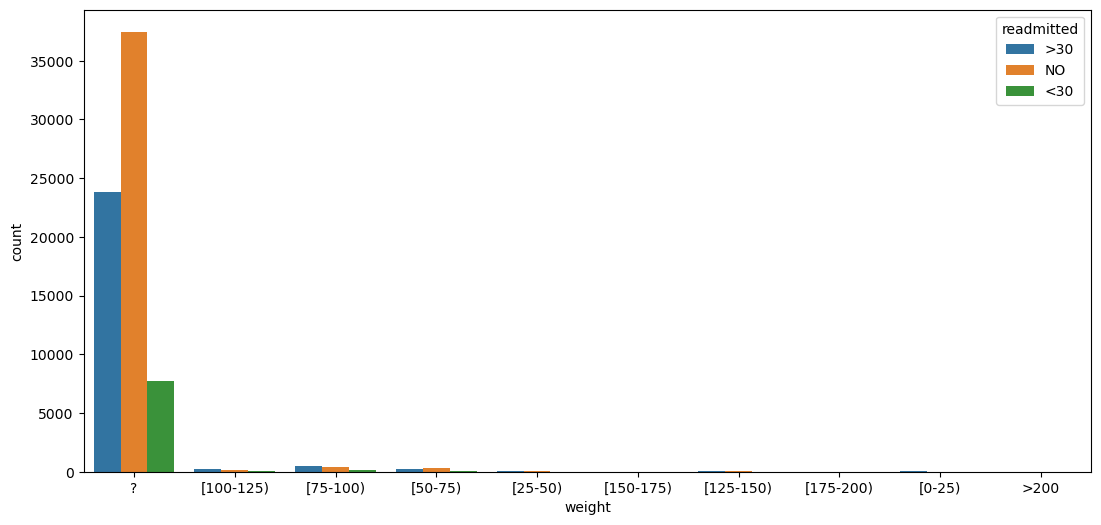

In [33]:
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='weight', hue='readmitted')

In [34]:
to_drop_features = ['encounter_id', 'patient_nbr','examide','citoglipton','acetohexamide','weight','tolbutamide','troglitazone','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','tolbutamide']

In [35]:
df.drop(columns=to_drop_features,inplace=True)

In [36]:
df.shape

(71235, 50)

In [37]:
df.head()

race  gender      age  admission_type_id  discharge_disposition_id  \
0  Caucasian  Female  [80-90)                  3                         1   
1  Caucasian    Male  [70-80)                  3                         5   
2  Caucasian  Female  [70-80)                  3                         3   
3  Caucasian    Male  [50-60)                  6                         1   
4  Caucasian    Male  [40-50)                  1                         1   

   admission_source_id  time_in_hospital payer_code       medical_specialty  \
0                    7                 5         MC        Emergency/Trauma   
1                    1                 3          ?             Orthopedics   
2                    1                 8         MC  Family/GeneralPractice   
3                    7                 7          ?                       ?   
4                    6                 2         UN        InternalMedicine   

   num_lab_procedures  ...  number_diagnoses2  number_inpatient2  \
0                  40  ...                 36                  2   
1                  22  ...                  8                  0   
2                  33  ...                  9                  0   
3                  52  ...                  6                  4   
4                  47  ...                 10                  1   

   number_emergency2  number_outpatient2  num_medications2 num_procedures2  \
0                  0                   0               107               5   
1                  0                   0                22               1   
2                  0                   0                 5               5   
3                  0                   0                15               1   
4                  0                   0                23               3   

  num_lab_procedures2 admission_type_id2  discharge_disposition_id2  \
0                 239                  9                          9   
1                  22                  3                          5   
2                  33                  3                          3   
3                  52                  6                          1   
4                  98                  2                          2   

  admission_source_id2  
0                   28  
1                    1  
2                    1  
3                    7  
4                   12  

[5 rows x 50 columns]

We've got 71236 examples in the dataset with 48 featues, 1 ID (`encounter_id`), and the labels (`readmitted`).

By looking at the features and a sample from the data, the features are numerical and catogerical types. What about some descriptive statistics?

## 📉 Data Visualisation


In [38]:
numeric_columns = list(df.select_dtypes(include='number').columns)
categorical_columns = list(df.select_dtypes(include="object").columns)

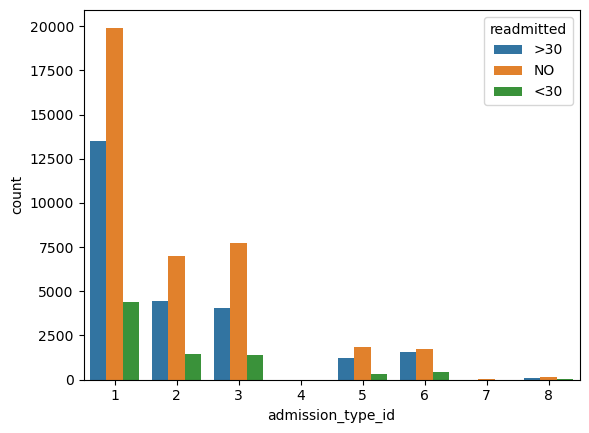

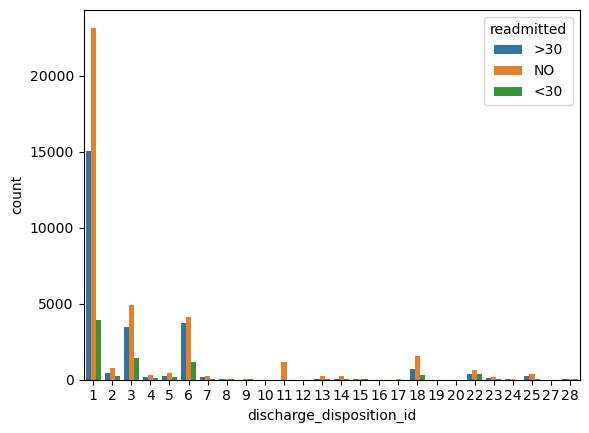

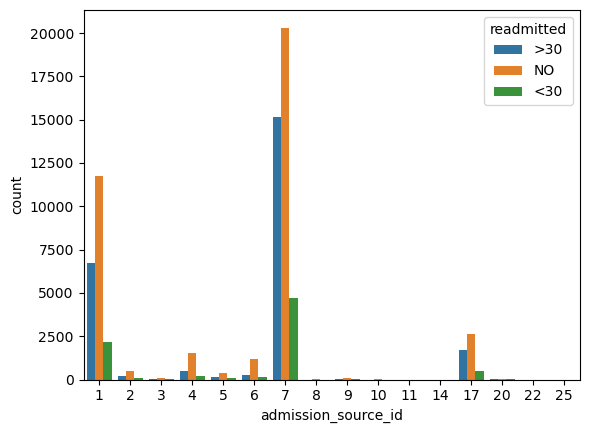

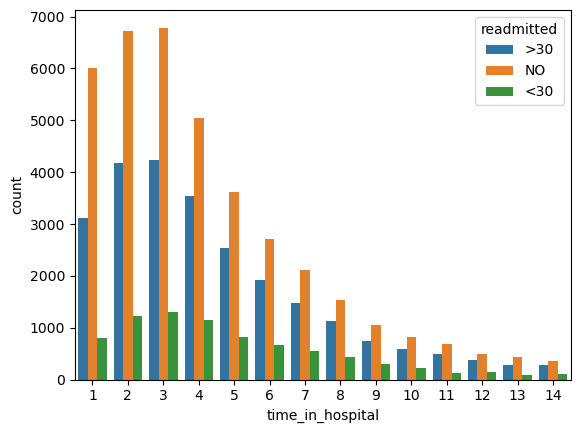

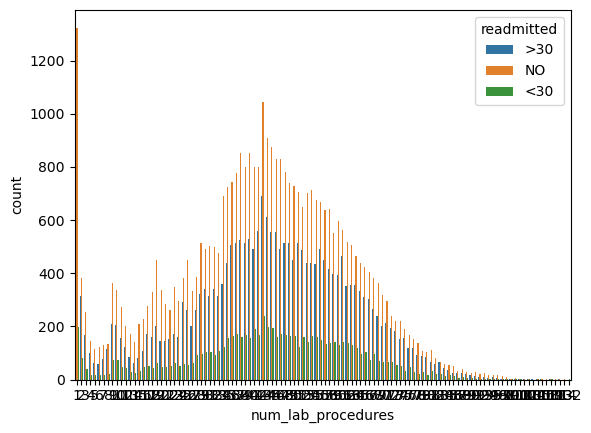

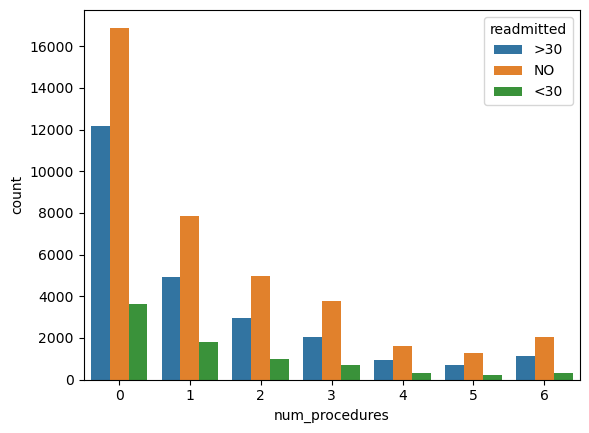

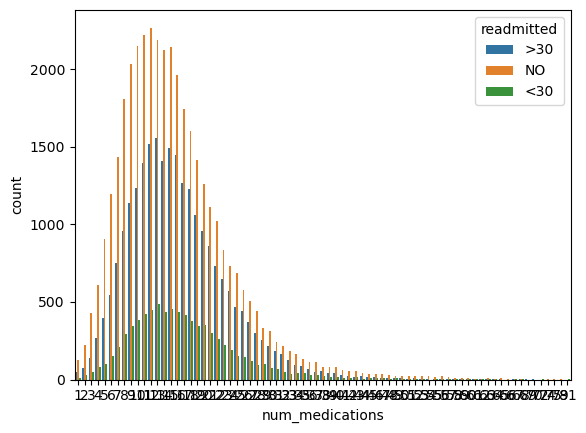

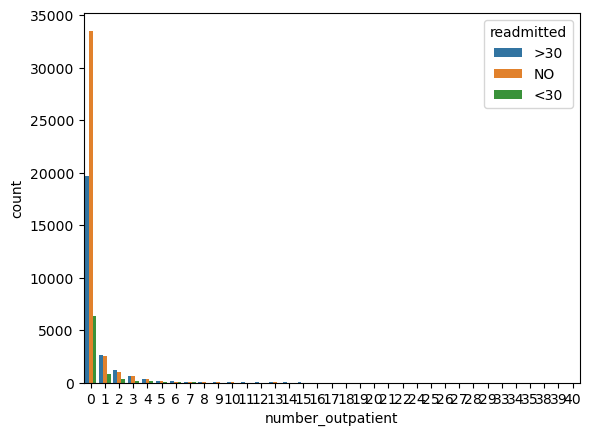

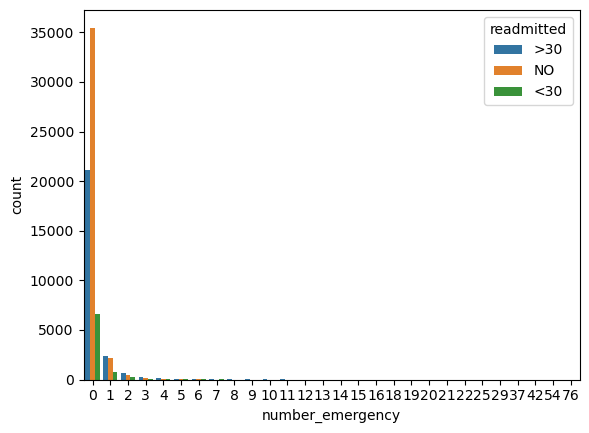

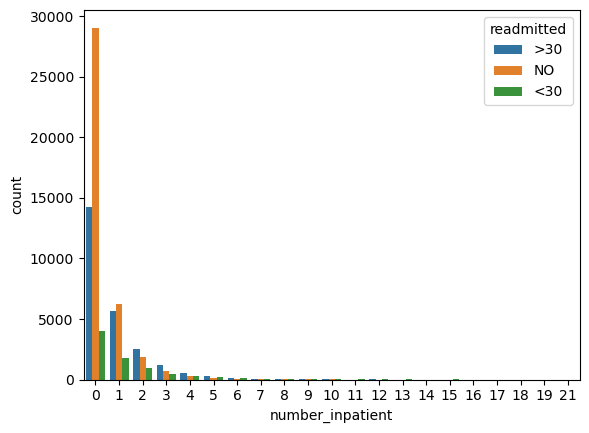

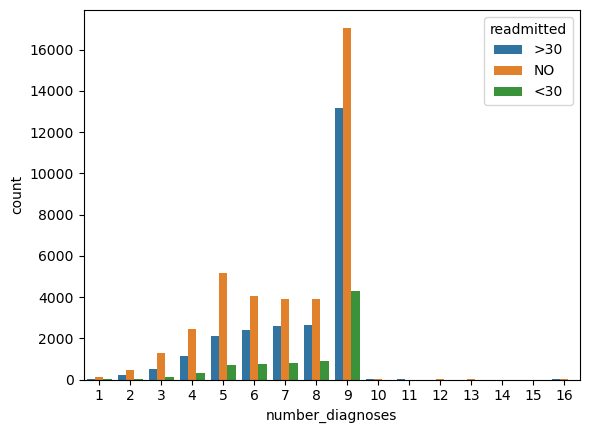

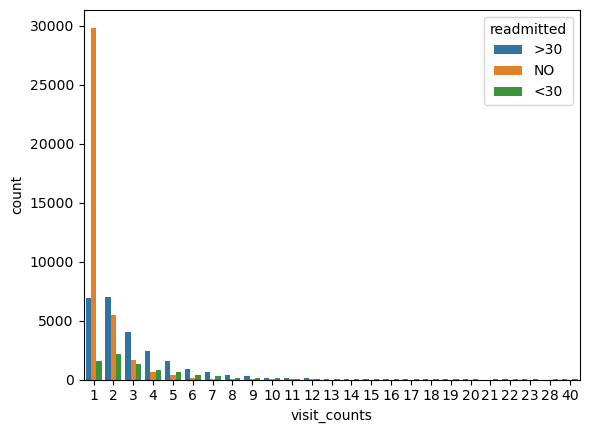

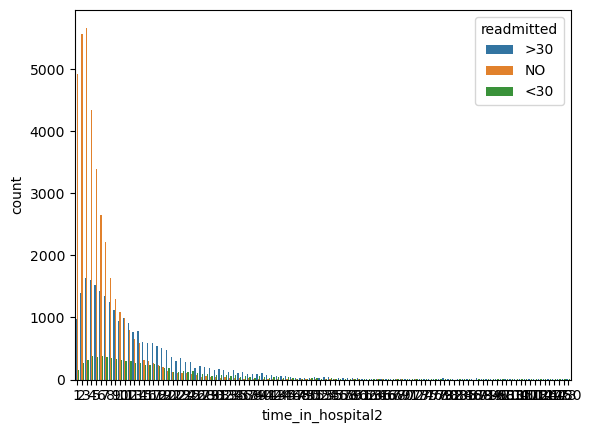

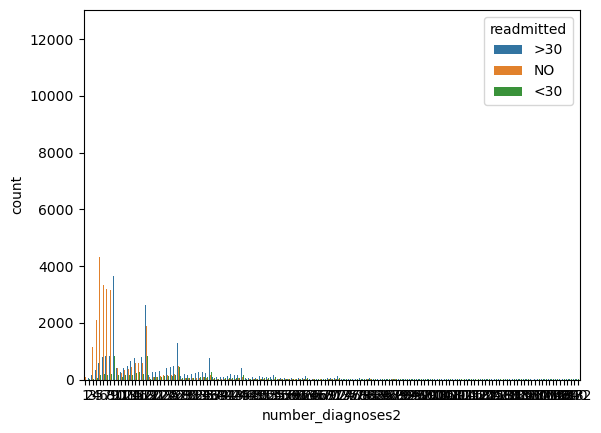

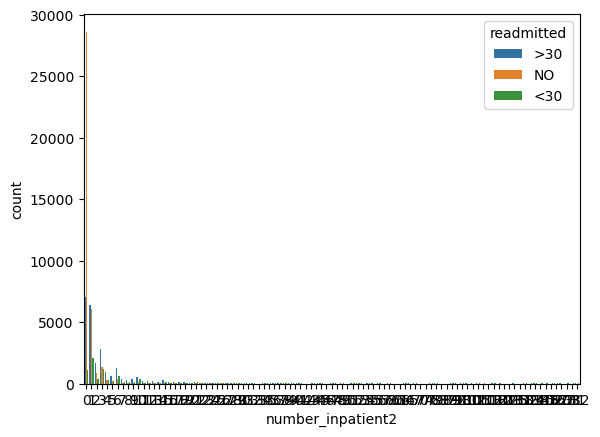

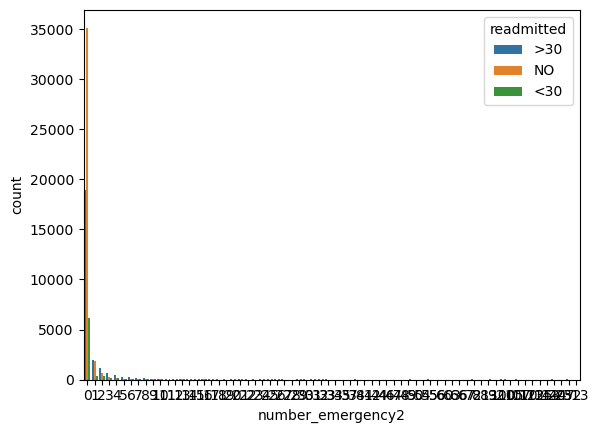

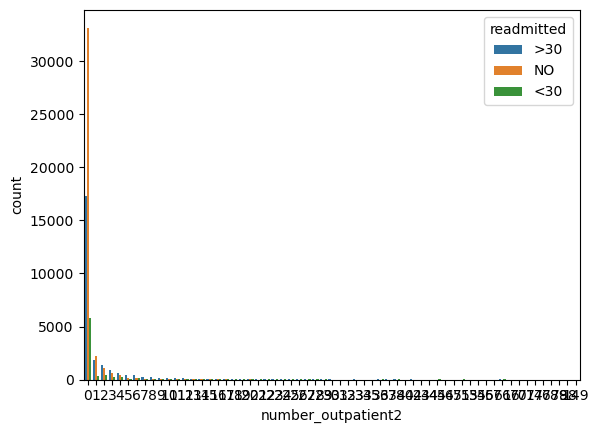

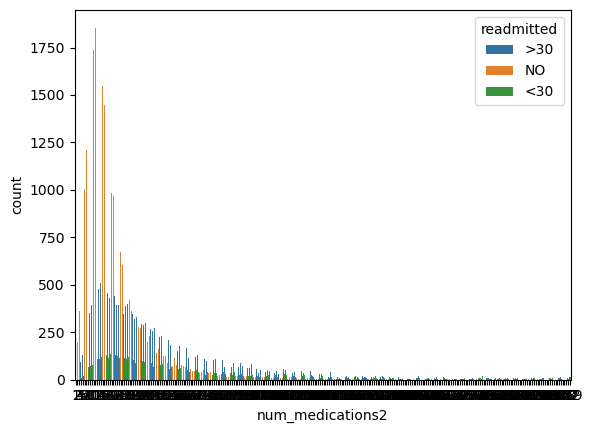

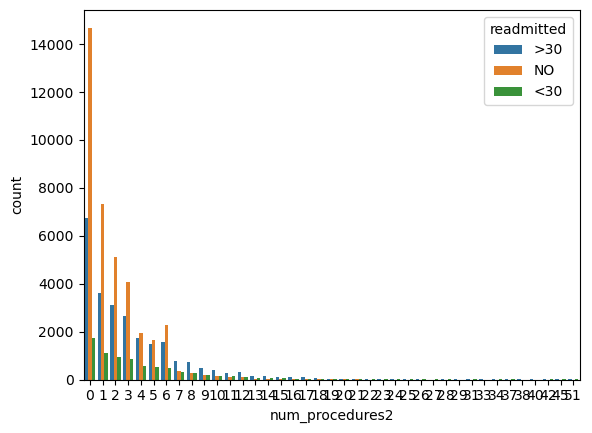

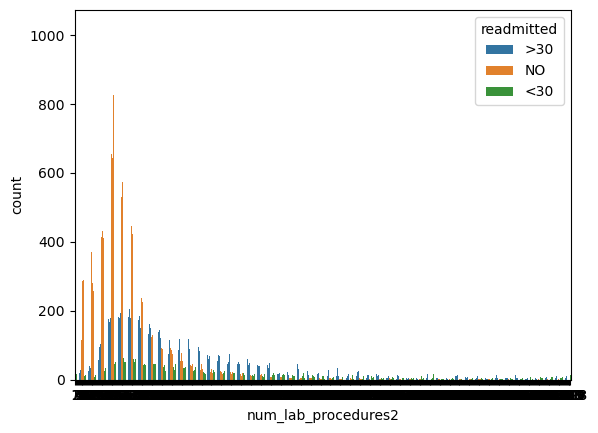

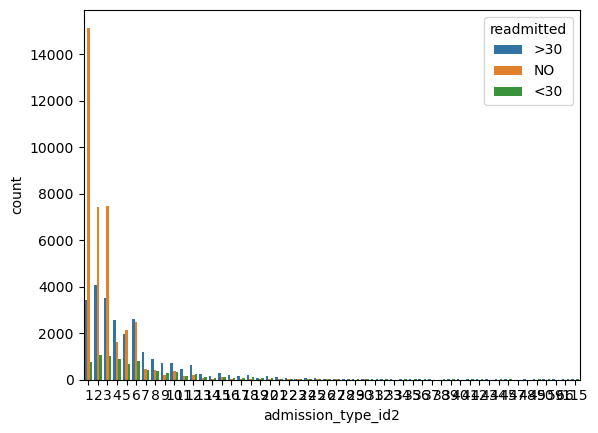

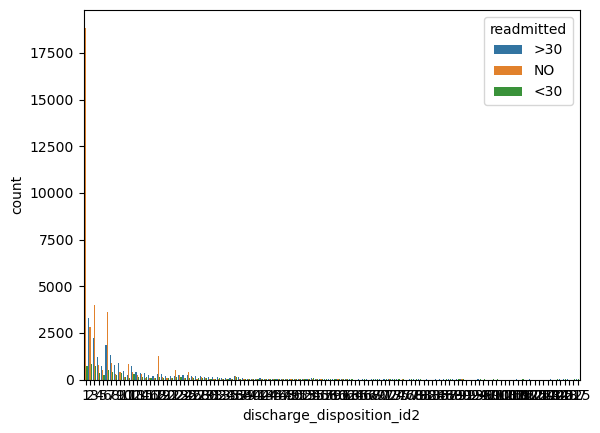

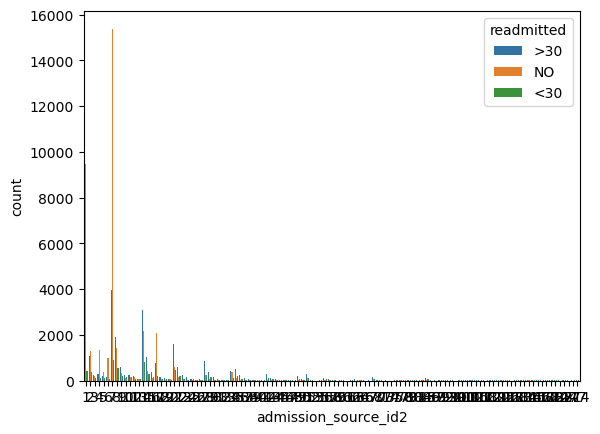

In [39]:
def plot_histogram(df,col):
    sns.countplot(data=df, x=col, hue='readmitted')
    plt.show()


for col in df[numeric_columns]:
    plot_histogram(df, col)

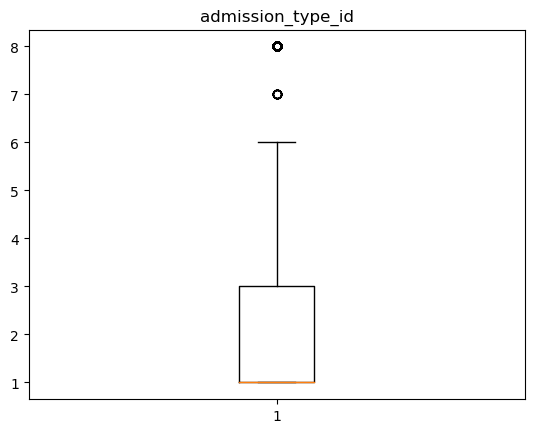

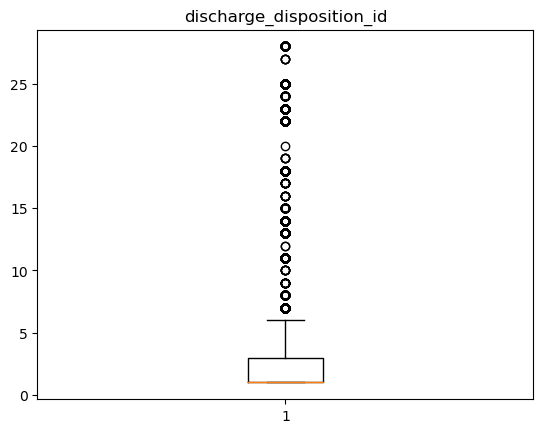

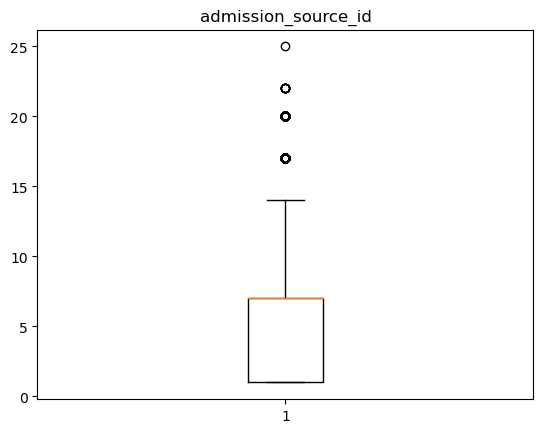

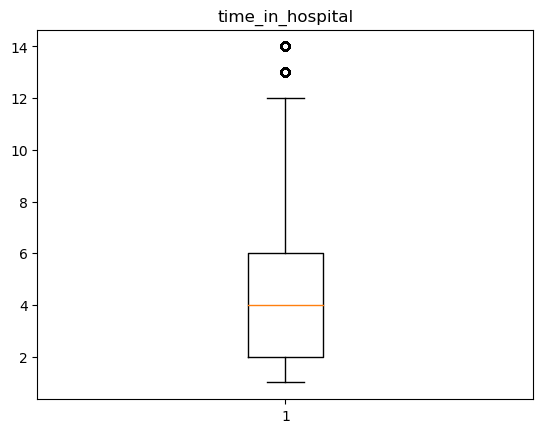

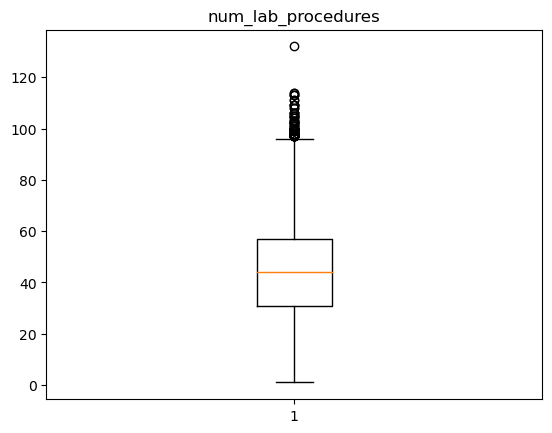

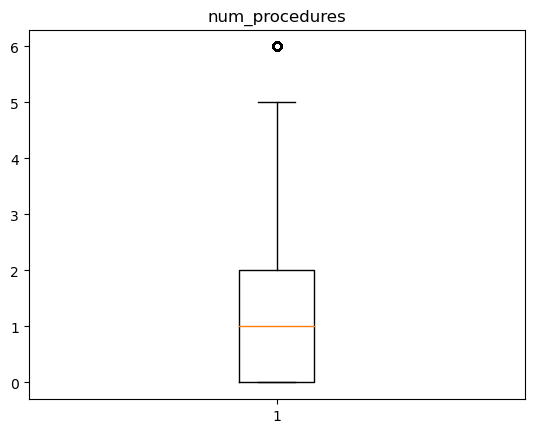

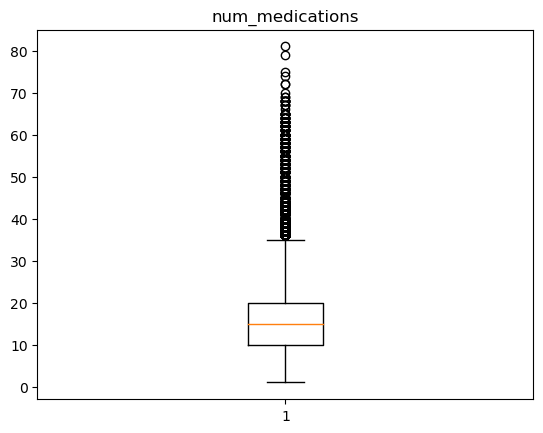

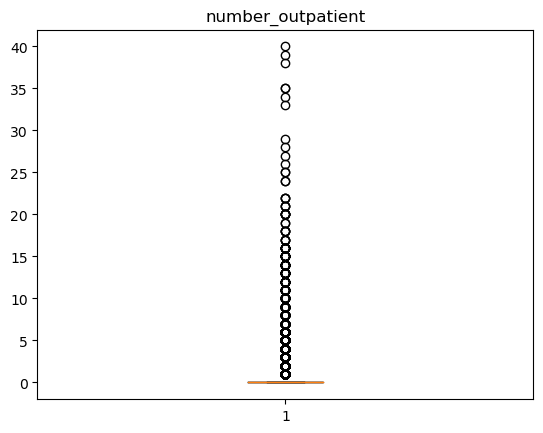

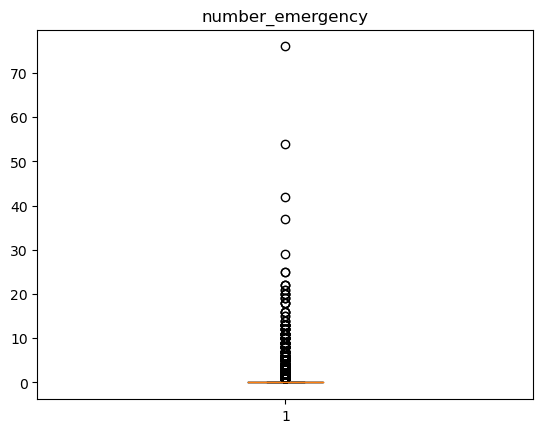

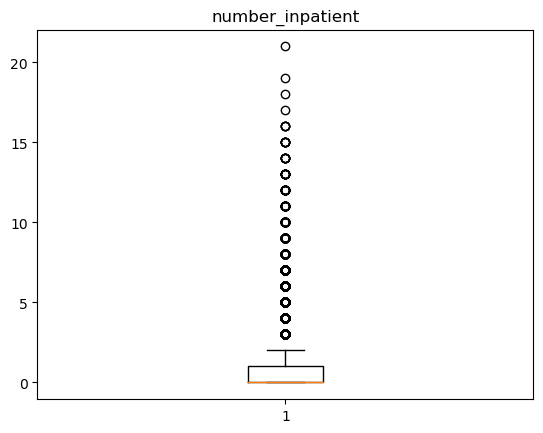

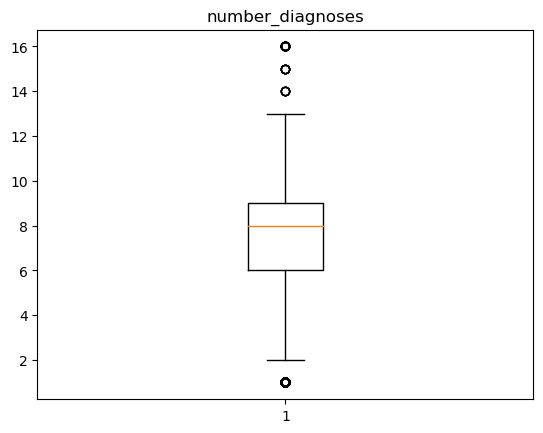

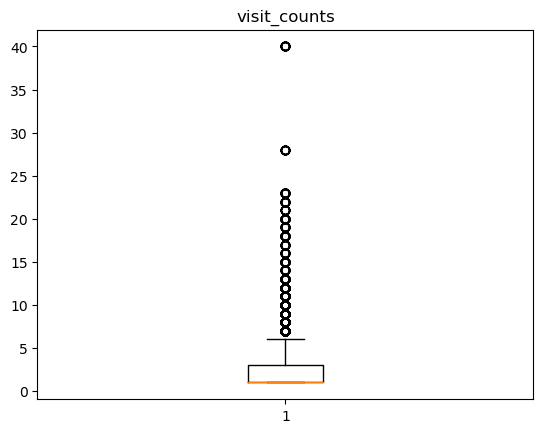

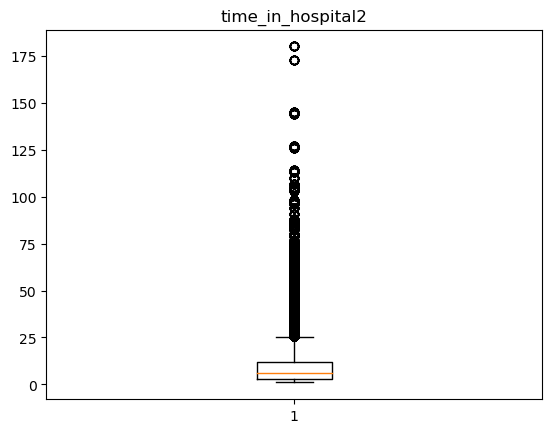

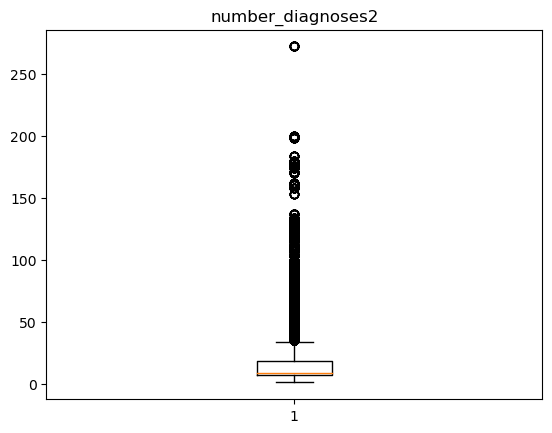

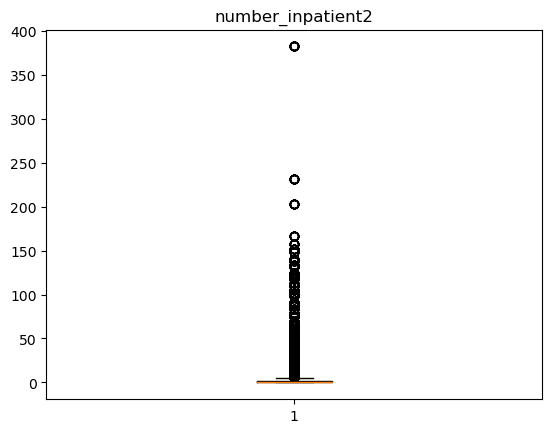

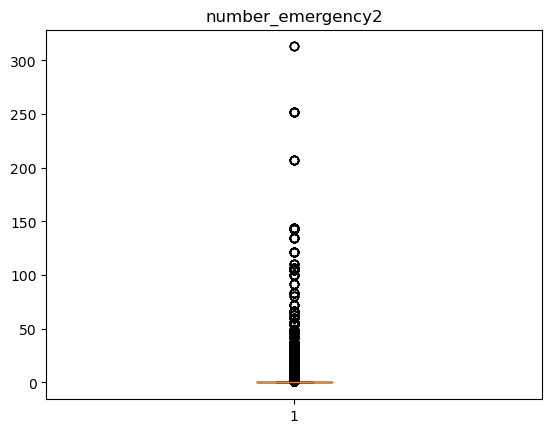

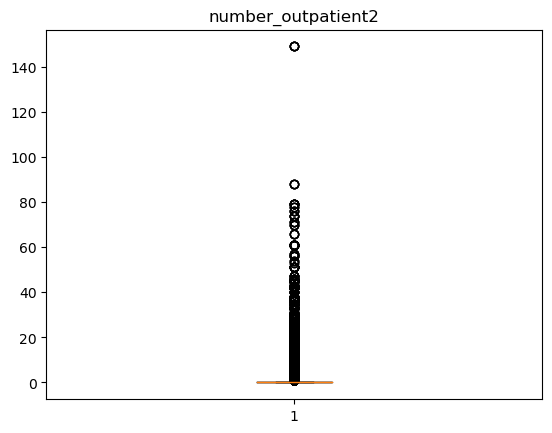

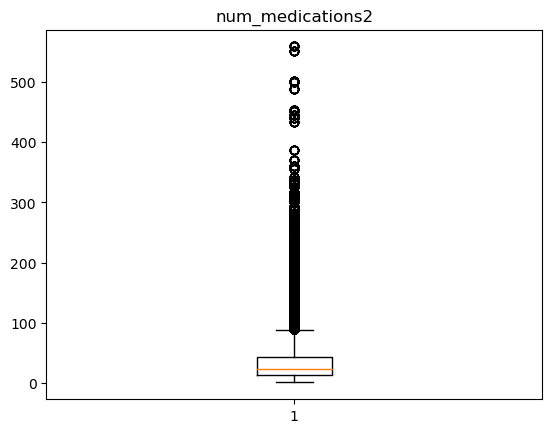

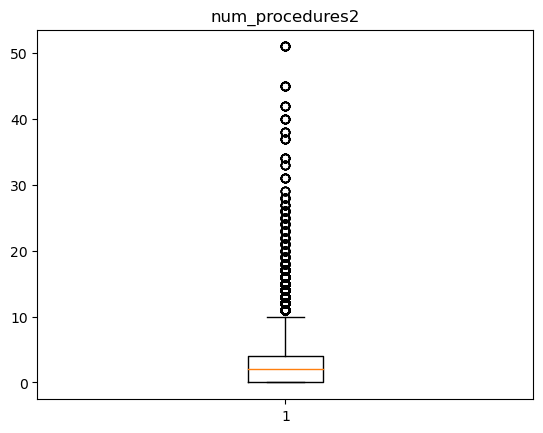

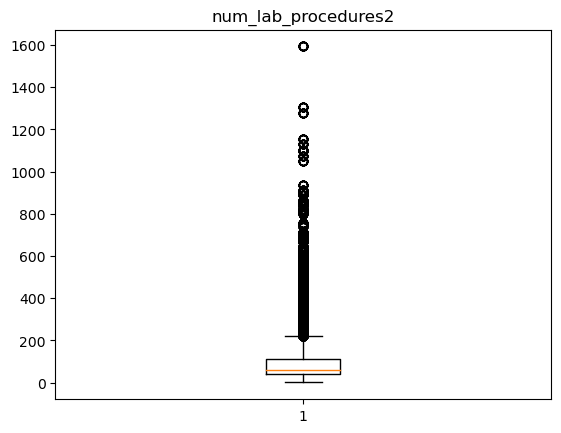

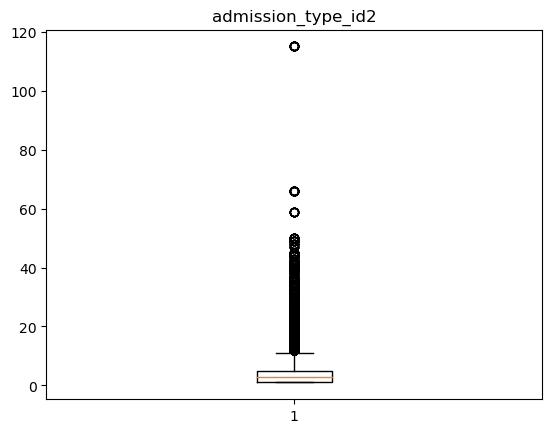

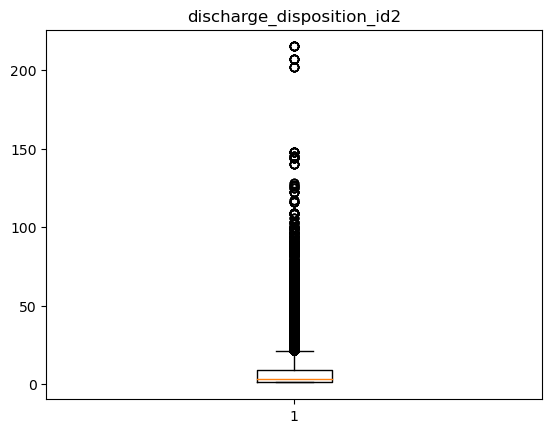

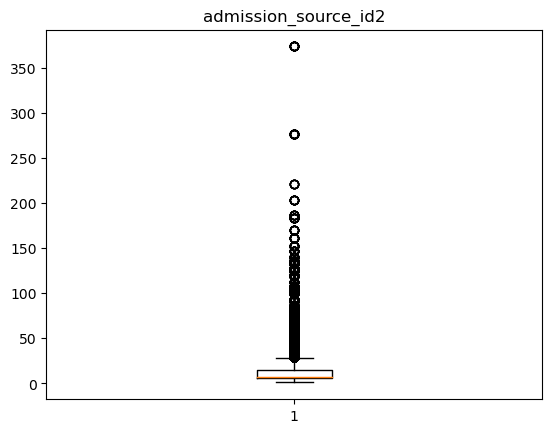

In [40]:
for i in df[numeric_columns]:
  plt.title(i)
  plt.boxplot(df[i])
  plt.show()

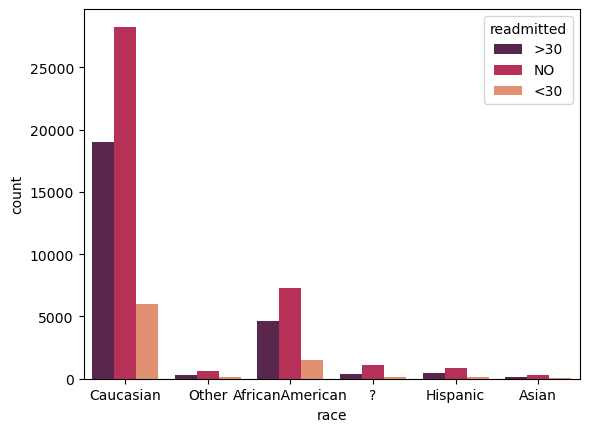

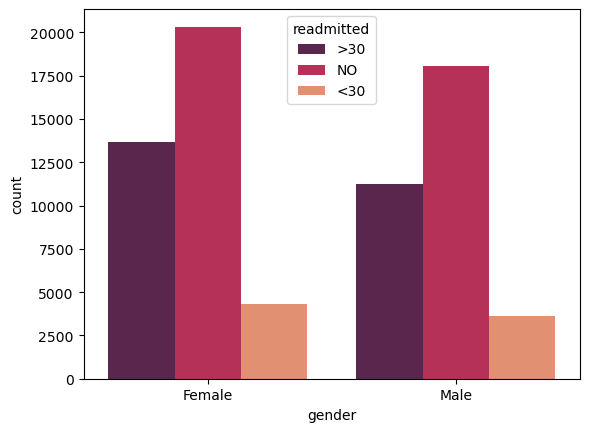

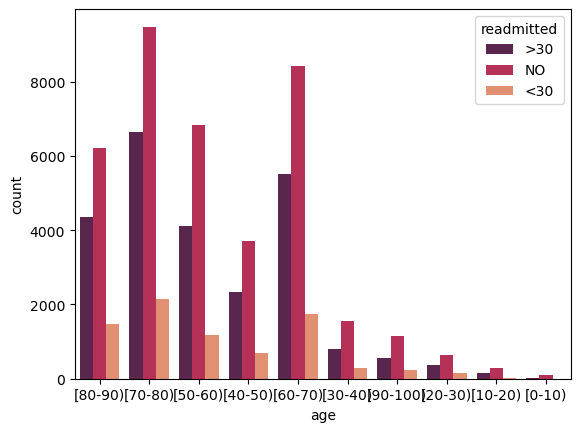

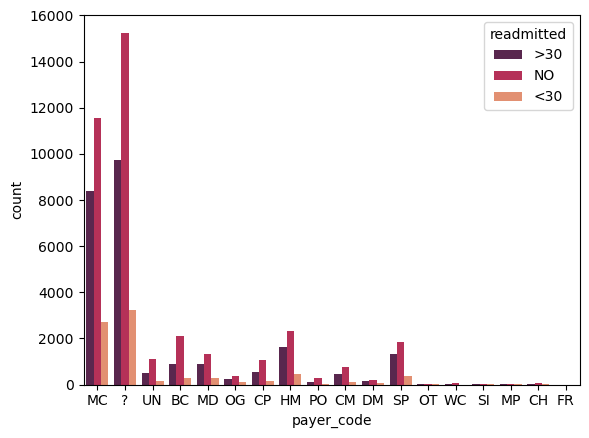

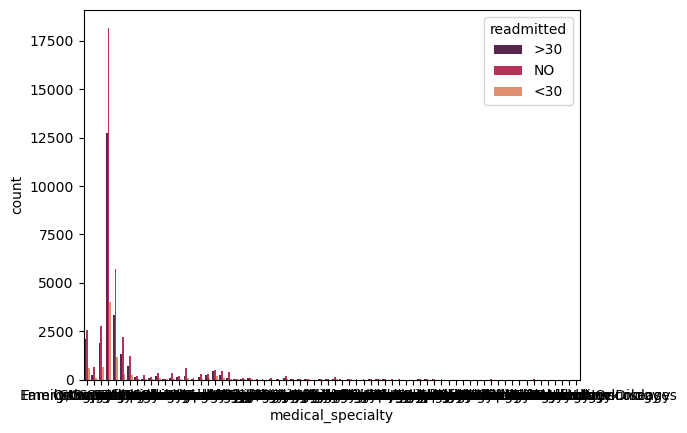

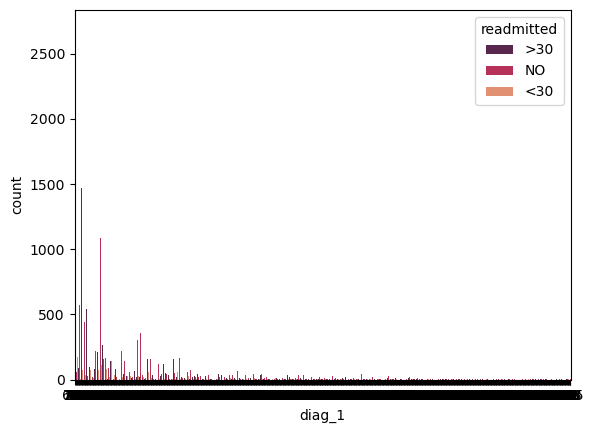

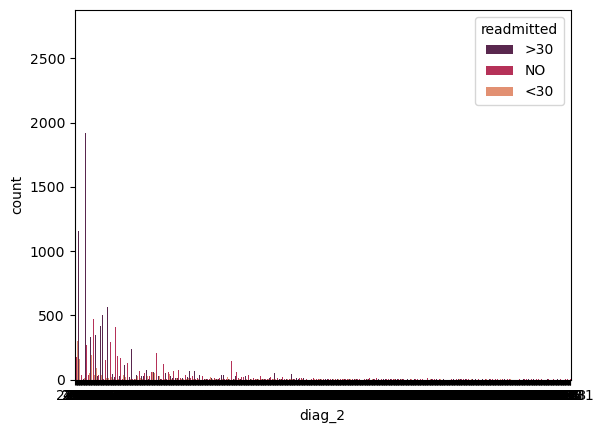

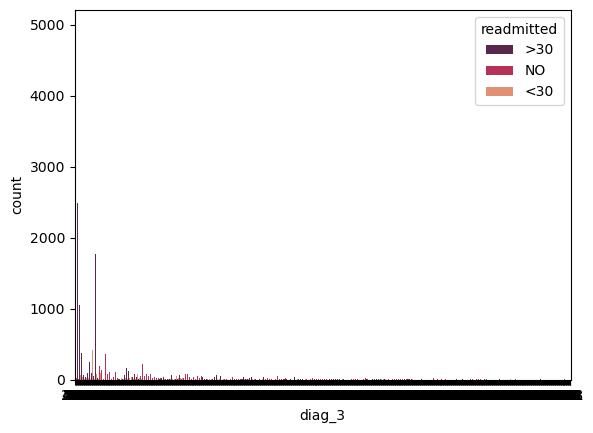

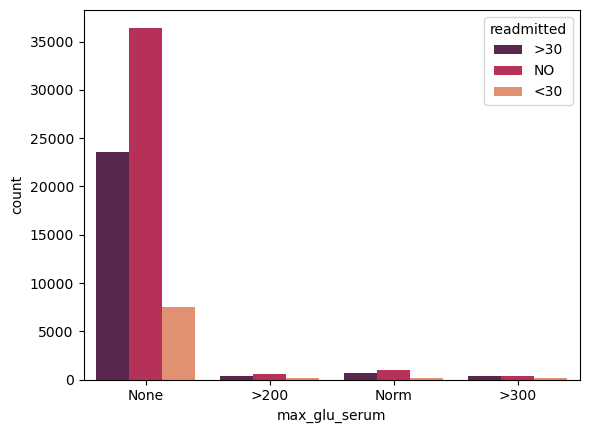

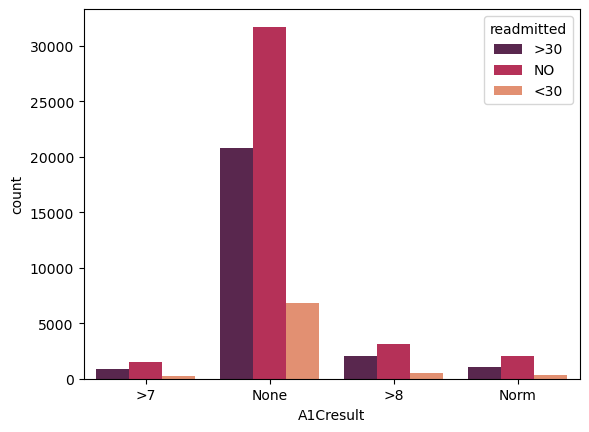

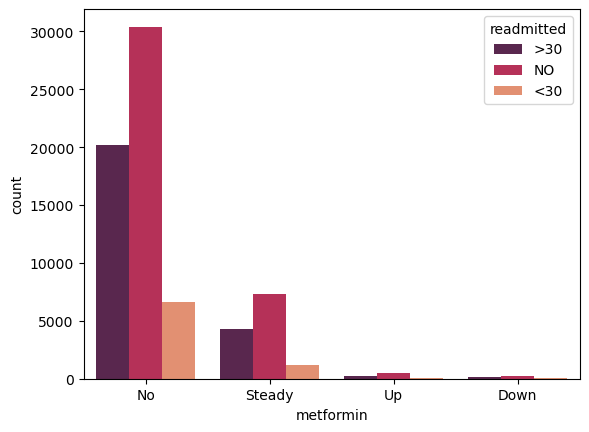

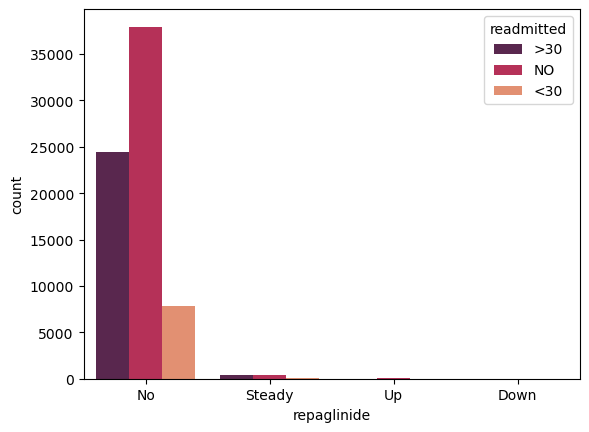

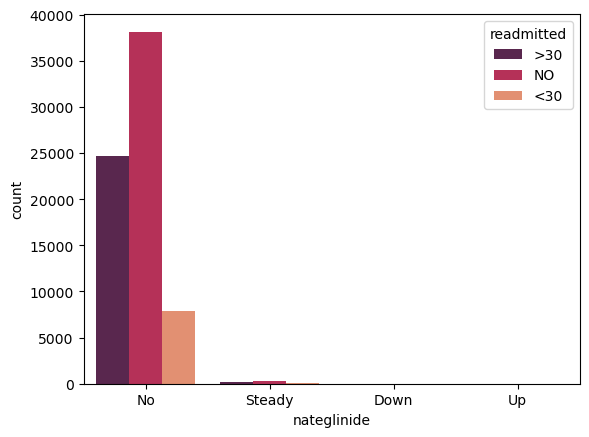

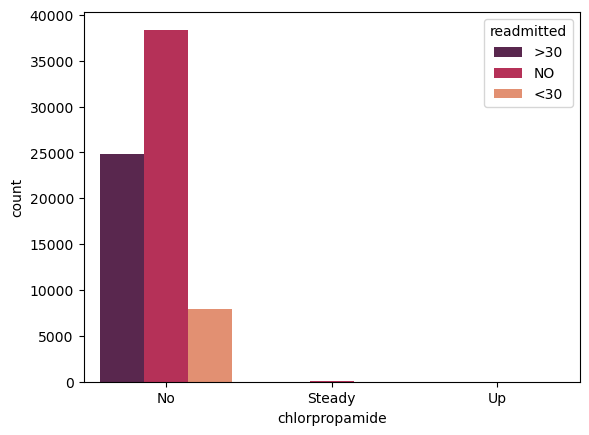

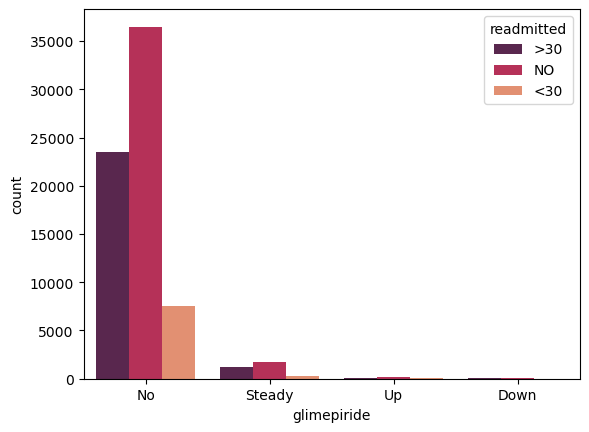

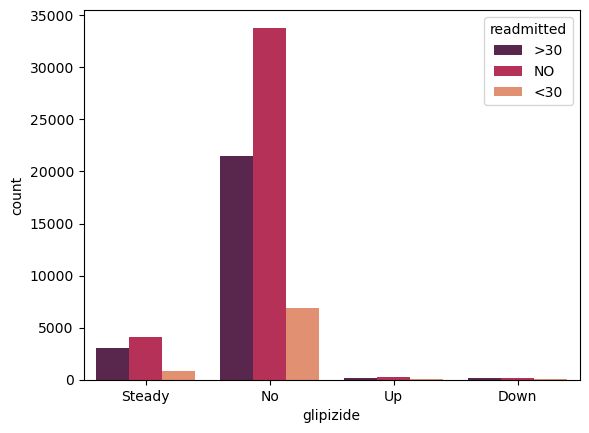

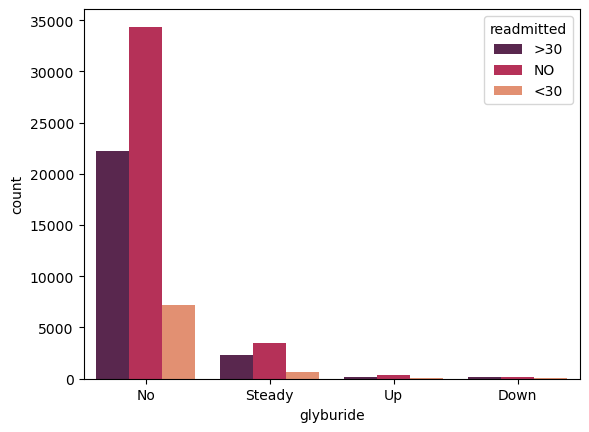

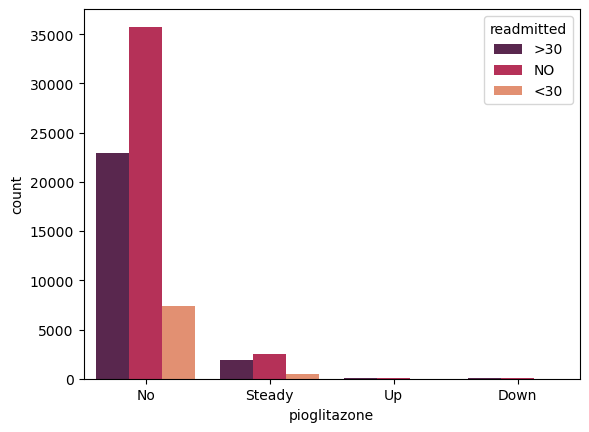

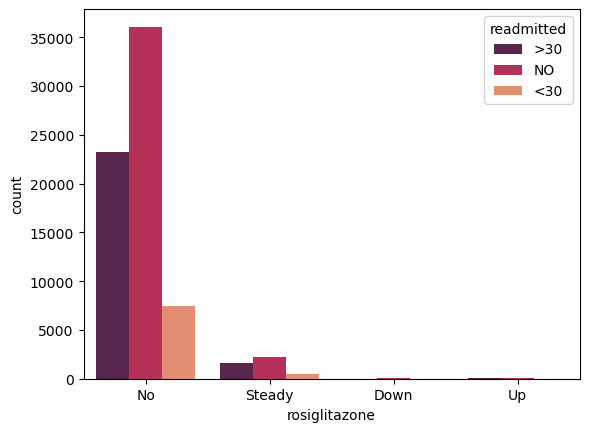

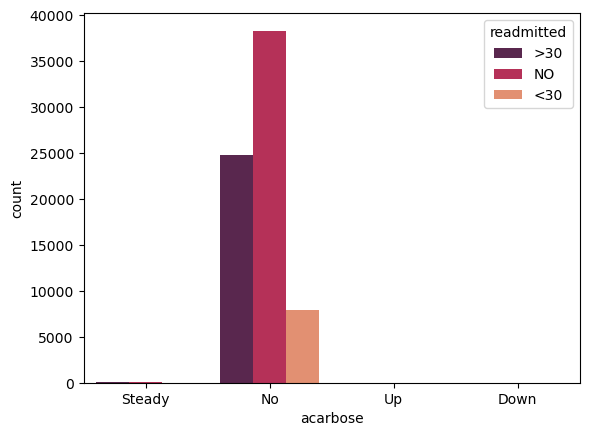

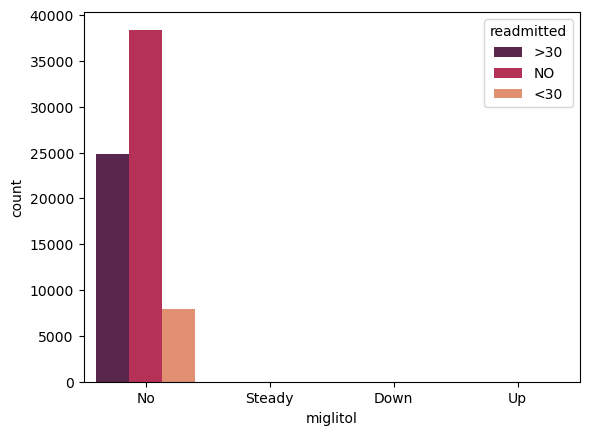

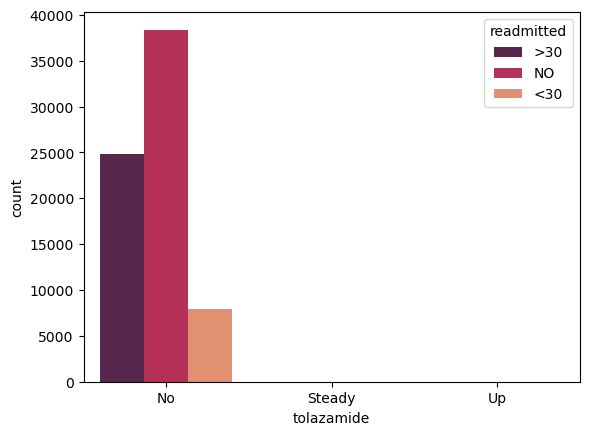

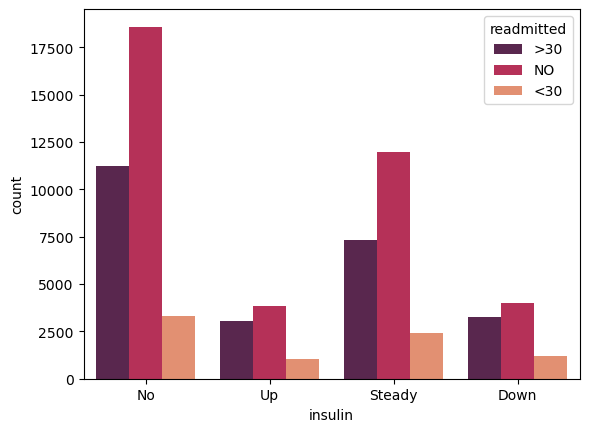

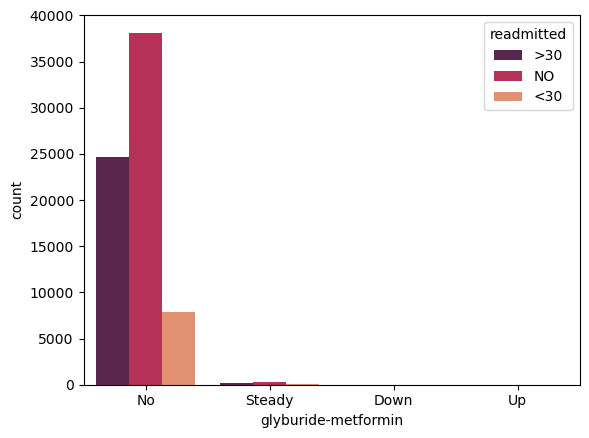

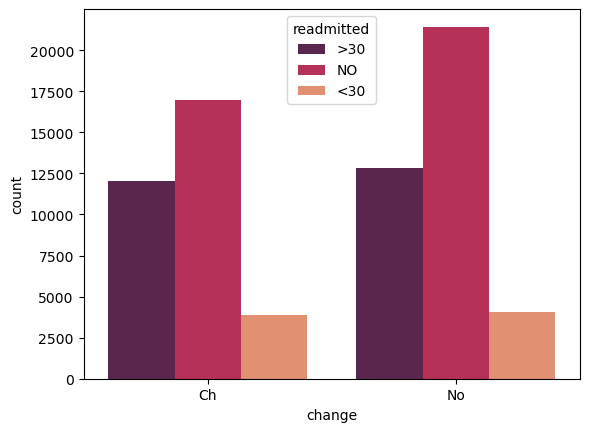

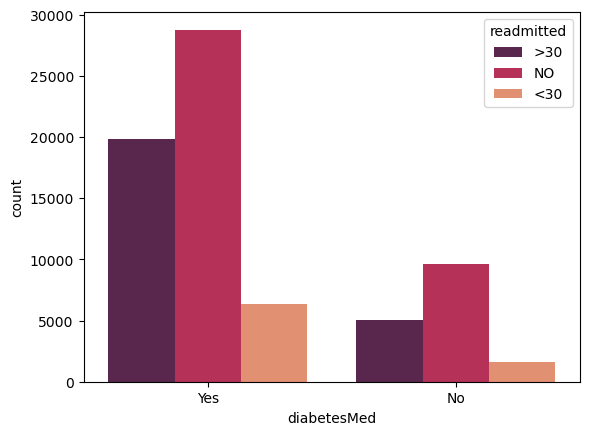

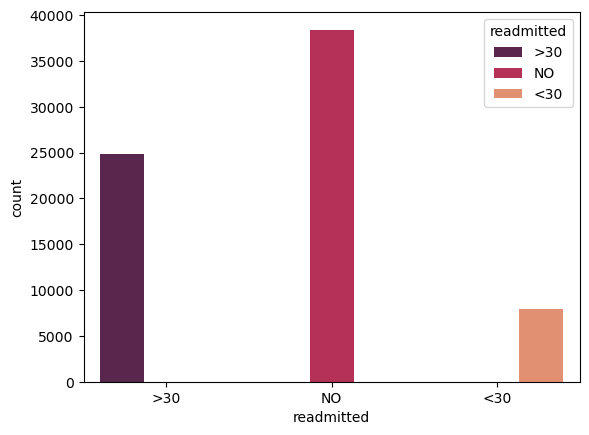

In [41]:
for i in range(len(categorical_columns)):
    sns.countplot(data = df, x = categorical_columns[i], palette="rocket",hue='readmitted')
    plt.show()

<AxesSubplot:>

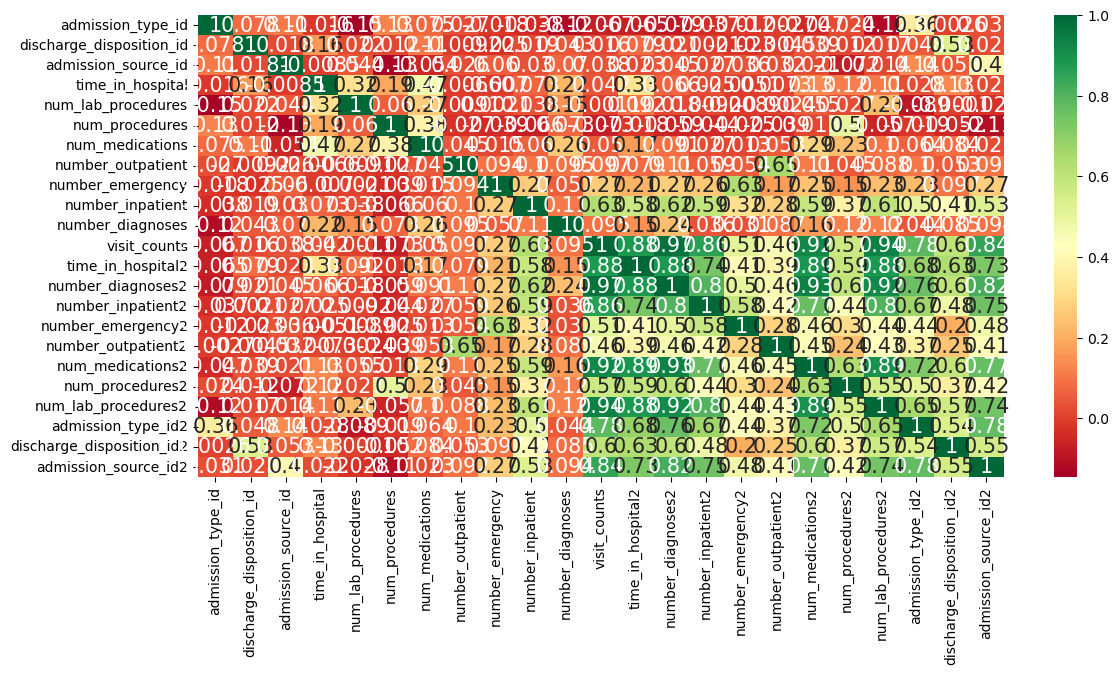

In [42]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

The output shows desciptive statistics for the numerical features. I'll use the numerical features `["time_in_hospital", "num_lab_procedures", "number_diagnoses"]` to demonstrate how to train the model and make submissions. **However you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.**

In [43]:
featuers = df.loc[:, df.columns != "readmitted"].copy()
lable = df.loc[:, "readmitted"].copy()

In [44]:
featuers.replace('?',np.NaN,inplace=True)

In [45]:
featuers["chlorpropamide"].value_counts()

No        71173
Steady       59
Up            3
Name: chlorpropamide, dtype: int64

In [46]:
featuers[(featuers['diag_2'] == "240")]

race  gender      age  admission_type_id  \
33588  AfricanAmerican  Female  [50-60)                  1   
56204        Caucasian    Male  [40-50)                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
33588                         1                    7                 1   
56204                         1                    7                 3   

      payer_code medical_specialty  num_lab_procedures  ...  \
33588         HM               NaN                  57  ...   
56204         SP               NaN                   1  ...   

       number_diagnoses2  number_inpatient2  number_emergency2  \
33588                  7                  0                  0   
56204                  6                  0                  0   

       number_outpatient2  num_medications2 num_procedures2  \
33588                   0                 6               0   
56204                   0                 6               0   

      num_lab_procedures2 admission_type_id2  discharge_disposition_id2  \
33588                  57                  1                          1   
56204                   1                  1                          1   

      admission_source_id2  
33588                    7  
56204                    7  

[2 rows x 49 columns]

In [47]:
featuers_notenc=featuers.copy()
featuers_notenc.head()

race  gender      age  admission_type_id  discharge_disposition_id  \
0  Caucasian  Female  [80-90)                  3                         1   
1  Caucasian    Male  [70-80)                  3                         5   
2  Caucasian  Female  [70-80)                  3                         3   
3  Caucasian    Male  [50-60)                  6                         1   
4  Caucasian    Male  [40-50)                  1                         1   

   admission_source_id  time_in_hospital payer_code       medical_specialty  \
0                    7                 5         MC        Emergency/Trauma   
1                    1                 3        NaN             Orthopedics   
2                    1                 8         MC  Family/GeneralPractice   
3                    7                 7        NaN                     NaN   
4                    6                 2         UN        InternalMedicine   

   num_lab_procedures  ...  number_diagnoses2  number_inpatient2  \
0                  40  ...                 36                  2   
1                  22  ...                  8                  0   
2                  33  ...                  9                  0   
3                  52  ...                  6                  4   
4                  47  ...                 10                  1   

   number_emergency2  number_outpatient2  num_medications2 num_procedures2  \
0                  0                   0               107               5   
1                  0                   0                22               1   
2                  0                   0                 5               5   
3                  0                   0                15               1   
4                  0                   0                23               3   

  num_lab_procedures2 admission_type_id2  discharge_disposition_id2  \
0                 239                  9                          9   
1                  22                  3                          5   
2                  33                  3                          3   
3                  52                  6                          1   
4                  98                  2                          2   

  admission_source_id2  
0                   28  
1                    1  
2                    1  
3                    7  
4                   12  

[5 rows x 49 columns]

### Label Encoding for Target Attrition

In [48]:
numeric_columns_enc = list(featuers.select_dtypes(include='number').columns)
categorical_columns_enc = list(featuers.select_dtypes(include="object").columns)

In [49]:
label_encoder = LabelEncoder()
lable = label_encoder.fit_transform(lable)
lable = pd.DataFrame(lable, index=df.index, columns=["readmitted"])
lable.value_counts()

readmitted
2             38404
1             24881
0              7950
dtype: int64

In [50]:
label_encoder.classes_

array(['<30', '>30', 'NO'], dtype=object)

In [51]:
featuers

race  gender      age  admission_type_id  \
0      Caucasian  Female  [80-90)                  3   
1      Caucasian    Male  [70-80)                  3   
2      Caucasian  Female  [70-80)                  3   
3      Caucasian    Male  [50-60)                  6   
4      Caucasian    Male  [40-50)                  1   
...          ...     ...      ...                ...   
71230  Caucasian    Male  [40-50)                  1   
71231  Caucasian    Male  [70-80)                  3   
71232  Caucasian    Male  [60-70)                  1   
71233  Caucasian  Female  [60-70)                  1   
71234  Caucasian    Male  [70-80)                  3   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
0                             1                    7                 5   
1                             5                    1                 3   
2                             3                    1                 8   
3                             1                    7                 7   
4                             1                    6                 2   
...                         ...                  ...               ...   
71230                         2                    7                 1   
71231                         1                    1                 2   
71232                         1                    7                 3   
71233                         1                    7                 1   
71234                         1                    1                 4   

      payer_code       medical_specialty  num_lab_procedures  ...  \
0             MC        Emergency/Trauma                  40  ...   
1            NaN             Orthopedics                  22  ...   
2             MC  Family/GeneralPractice                  33  ...   
3            NaN                     NaN                  52  ...   
4             UN        InternalMedicine                  47  ...   
...          ...                     ...                 ...  ...   
71230         MD                     NaN                  34  ...   
71231         MC  Family/GeneralPractice                  26  ...   
71232        NaN              Nephrology                  44  ...   
71233         MC                     NaN                  12  ...   
71234         SP                     NaN                  47  ...   

       number_diagnoses2  number_inpatient2  number_emergency2  \
0                     36                  2                  0   
1                      8                  0                  0   
2                      9                  0                  0   
3                      6                  4                  0   
4                     10                  1                  0   
...                  ...                ...                ...   
71230                 36                  5                 24   
71231                  9                  0                  1   
71232                 87                 27                  0   
71233                  3                  0                  0   
71234                  5                  0                  0   

       number_outpatient2  num_medications2 num_procedures2  \
0                       0               107               5   
1                       0                22               1   
2                       0                 5               5   
3                       0                15               1   
4                       0                23               3   
...                   ...               ...             ...   
71230                   0                52               1   
71231                   5                10               0   
71232                   0               129              19   
71233                   0                 3               0   
71234                   0                12               0   

      num_lab_procedures2 admission_type_id2  discharge_disposition_id2

In [52]:
ecoder_list=[]
for col in categorical_columns_enc:
    feauters_encoder = LabelEncoder()
    featuers[col][featuers[col].notnull()]= feauters_encoder.fit_transform(featuers[col][featuers[col].notnull()])
    ecoder_list.append(feauters_encoder)


In [53]:
featuers

race gender age  admission_type_id  discharge_disposition_id  \
0        2      0   8                  3                         1   
1        2      1   7                  3                         5   
2        2      0   7                  3                         3   
3        2      1   5                  6                         1   
4        2      1   4                  1                         1   
...    ...    ...  ..                ...                       ...   
71230    2      1   4                  1                         2   
71231    2      1   7                  3                         1   
71232    2      1   6                  1                         1   
71233    2      0   6                  1                         1   
71234    2      1   7                  3                         1   

       admission_source_id  time_in_hospital payer_code medical_specialty  \
0                        7                 5          7                 8   
1                        1                 3        NaN                26   
2                        1                 8          7                11   
3                        7                 7        NaN               NaN   
4                        6                 2         15                17   
...                    ...               ...        ...               ...   
71230                    7                 1          8               NaN   
71231                    1                 2          7                11   
71232                    7                 3        NaN                18   
71233                    7                 1          7               NaN   
71234                    1                 4         14               NaN   

       num_lab_procedures  ...  number_diagnoses2  number_inpatient2  \
0                      40  ...                 36                  2   
1                      22  ...                  8                  0   
2                      33  ...                  9                  0   
3                      52  ...                  6                  4   
4                      47  ...                 10                  1   
...                   ...  ...                ...                ...   
71230                  34  ...                 36                  5   
71231                  26  ...                  9                  0   
71232                  44  ...                 87                 27   
71233                  12  ...                  3                  0   
71234                  47  ...                  5                  0   

       number_emergency2  number_outpatient2  num_medications2  \
0                      0                   0               107   
1                      0                   0                22   
2                      0                   0                 5   
3                      0                   0                15   
4                      0                   0                23   
...                  ...                 ...               ...   
71230                 24                   0                52   
71231                  1                   5                10   
71232                  0                   0               129   
71233                  0                   0                 3   
71234                  0                   0                12   

      num_procedures2 num_lab_procedures2 admission_type_id2  \
0                   5                 239                  9   
1                   1                  22                  3   
2                   5                  33                  3   
3                   1                  52                  6   
4                   3                  98                  2   
...               ...                 ...                ...   
71230               1                 151                  4   
71231               0                  26                  3   
71232 

In [54]:
featuers.isna().sum()

race                          1591
gender                           0
age                              0
admission_type_id                0
discharge_disposition_id         0
admission_source_id              0
time_in_hospital                 0
payer_code                   28218
medical_specialty            34986
num_lab_procedures               0
num_procedures                   0
num_medications                  0
number_outpatient                0
number_emergency                 0
number_inpatient                 0
diag_1                          12
diag_2                         245
diag_3                        1009
number_diagnoses                 0
max_glu_serum                    0
A1Cresult                        0
metformin                        0
repaglinide                      0
nateglinide                      0
chlorpropamide                   0
glimepiride                      0
glipizide                        0
glyburide                        0
pioglitazone        

In [55]:
ecoder_list[0].classes_

array(['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other'],
      dtype=object)

### Dealing with nan

In [56]:
# create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# fit and transform the dataframe
df_imputed = pd.DataFrame(imputer.fit_transform(featuers), columns=featuers.columns)

# print the imputed dataframe
print(df_imputed)

       race  gender  age  admission_type_id  discharge_disposition_id  \
0       2.0     0.0  8.0                3.0                       1.0   
1       2.0     1.0  7.0                3.0                       5.0   
2       2.0     0.0  7.0                3.0                       3.0   
3       2.0     1.0  5.0                6.0                       1.0   
4       2.0     1.0  4.0                1.0                       1.0   
...     ...     ...  ...                ...                       ...   
71230   2.0     1.0  4.0                1.0                       2.0   
71231   2.0     1.0  7.0                3.0                       1.0   
71232   2.0     1.0  6.0                1.0                       1.0   
71233   2.0     0.0  6.0                1.0                       1.0   
71234   2.0     1.0  7.0                3.0                       1.0   

       admission_source_id  time_in_hospital  payer_code  medical_specialty  \
0                      7.0               5.0

In [57]:
#df_imputed.payer_code.value_counts().sort_index()
for i in df_imputed.columns : 
    df_imputed[i] = round(df_imputed[i]).astype('int')
    
df_imputed

race  gender  age  admission_type_id  discharge_disposition_id  \
0         2       0    8                  3                         1   
1         2       1    7                  3                         5   
2         2       0    7                  3                         3   
3         2       1    5                  6                         1   
4         2       1    4                  1                         1   
...     ...     ...  ...                ...                       ...   
71230     2       1    4                  1                         2   
71231     2       1    7                  3                         1   
71232     2       1    6                  1                         1   
71233     2       0    6                  1                         1   
71234     2       1    7                  3                         1   

       admission_source_id  time_in_hospital  payer_code  medical_specialty  \
0                        7                 5           7                  8   
1                        1                 3           6                 26   
2                        1                 8           7                 11   
3                        7                 7           7                 15   
4                        6                 2          15                 17   
...                    ...               ...         ...                ...   
71230                    7                 1           8                 17   
71231                    1                 2           7                 11   
71232                    7                 3           7                 18   
71233                    7                 1           7                 34   
71234                    1                 4          14                 16   

       num_lab_procedures  ...  number_diagnoses2  number_inpatient2  \
0                      40  ...                 36                  2   
1                      22  ...                  8                  0   
2                      33  ...                  9                  0   
3                      52  ...                  6                  4   
4                      47  ...                 10                  1   
...                   ...  ...                ...                ...   
71230                  34  ...                 36                  5   
71231                  26  ...                  9                  0   
71232                  44  ...                 87                 27   
71233                  12  ...                  3                  0   
71234                  47  ...                  5                  0   

       number_emergency2  number_outpatient2  num_medications2  \
0                      0                   0               107   
1                      0                   0                22   
2                      0                   0                 5   
3                      0                   0                15   
4                      0                   0                23   
...                  ...                 ...               ...   
71230                 24                   0                52   
71231                  1                   5                10   
71232                  0                   0               129   
71233                  0                   0                 3   
71234                  0                   0                12   

       num_procedures2  num_lab_procedures2  admission_type_id2  \
0                    5                  239                   9   
1                    1                   22                   3   
2                    5                   33                   3   
3                    1                   52                   6   
4                    3                   98                   2   
...                ...                  ...                 ...   
71230                1                  151           

In [58]:
dfff=df_imputed.copy()

In [59]:
df_imputed.payer_code.value_counts().sort_index()

0      3303
1       119
2      1374
3      2086
4      1416
5      2544
6      9495
7     30707
8      7441
9      3026
10     2840
11      645
12      729
13      150
14     3532
15     1731
16       97
Name: payer_code, dtype: int64

In [60]:
numeric_columns_enc

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'visit_counts',
 'time_in_hospital2',
 'number_diagnoses2',
 'number_inpatient2',
 'number_emergency2',
 'number_outpatient2',
 'num_medications2',
 'num_procedures2',
 'num_lab_procedures2',
 'admission_type_id2',
 'discharge_disposition_id2',
 'admission_source_id2']

### Scaling & Transformation

In [61]:
dff=df_imputed[['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'time_in_hospital','time_in_hospital2',
 'number_inpatient2',
 'number_emergency2',
 'number_outpatient2',
 'num_medications2',
 'num_procedures2',
 'num_lab_procedures2',
 'admission_type_id2',
 'discharge_disposition_id2',
 'admission_source_id2']
]

In [62]:
dfp=df_imputed[['visit_counts','number_diagnoses','number_diagnoses2']]

In [63]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [64]:
pt.fit(dff)

PowerTransformer()

In [65]:
dt=pt.transform(dff)

In [66]:
dt

array([[ 1.12533678, -0.8007166 ,  0.47452407, ...,  1.33199443,
         0.82074679,  1.22168166],
       [ 1.12533678,  1.20526823, -1.37959069, ...,  0.12290196,
         0.34945854, -1.6196994 ],
       [ 1.12533678,  0.76156103, -1.37959069, ...,  0.12290196,
        -0.11288552, -1.6196994 ],
       ...,
       [-0.89973049, -0.8007166 ,  0.47452407, ...,  1.75010381,
         1.48986568,  1.71176784],
       [-0.89973049, -0.8007166 ,  0.47452407, ..., -1.30275342,
        -1.13576161, -0.11935823],
       [ 1.12533678, -0.8007166 , -1.37959069, ...,  0.12290196,
        -1.13576161, -1.6196994 ]])

In [67]:

dt=pd.DataFrame(dt,columns=['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'time_in_hospital',
'time_in_hospital2',
 'number_inpatient2',
 'number_emergency2',
 'number_outpatient2',
 'num_medications2',
 'num_procedures2',
 'num_lab_procedures2',
 'admission_type_id2',
 'discharge_disposition_id2',
 'admission_source_id2'])

In [68]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)

In [69]:
dt2=transformer.transform(dfp)

In [70]:
dt2=pd.DataFrame(dt2,columns=['number_diagnoses','number_diagnoses2',
 'visit_counts'])

In [71]:
dt2

number_diagnoses  number_diagnoses2  visit_counts
0              2.302585           3.610918      1.609438
1              2.197225           2.197225      0.693147
2              2.302585           2.302585      0.693147
3              1.945910           1.945910      0.693147
4              1.791759           2.397895      1.098612
...                 ...                ...           ...
71230          2.302585           3.610918      1.609438
71231          2.302585           2.302585      0.693147
71232          2.302585           4.477337      2.397895
71233          1.386294           1.386294      0.693147
71234          1.791759           1.791759      0.693147

[71235 rows x 3 columns]

In [72]:
dff

admission_type_id  discharge_disposition_id  admission_source_id  \
0                      3                         1                    7   
1                      3                         5                    1   
2                      3                         3                    1   
3                      6                         1                    7   
4                      1                         1                    6   
...                  ...                       ...                  ...   
71230                  1                         2                    7   
71231                  3                         1                    1   
71232                  1                         1                    7   
71233                  1                         1                    7   
71234                  3                         1                    1   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
0                      40               2               25                  0   
1                      22               1               22                  0   
2                      33               5                5                  0   
3                      52               1               15                  0   
4                      47               2               10                  0   
...                   ...             ...              ...                ...   
71230                  34               0               11                  0   
71231                  26               0               10                  5   
71232                  44               1               15                  0   
71233                  12               0                3                  0   
71234                  47               0               12                  0   

       number_emergency  number_inpatient  time_in_hospital  \
0                     0                 0                 5   
1                     0                 0                 3   
2                     0                 0                 8   
3                     0                 4                 7   
4                     0                 1                 2   
...                 ...               ...               ...   
71230                 1                 0                 1   
71231                 1                 0                 2   
71232                 0                 4                 3   
71233                 0                 0                 1   
71234                 0                 0                 4   

       time_in_hospital2  number_inpatient2  number_emergency2  \
0                     26                  2                  0   
1                      3                  0                  0   
2                      8                  0                  0   
3                      7                  4                  0   
4                      4                  1                  0   
...                  ...                ...                ...   
71230                 20                  5                 24   
71231                  2                  0                  1   
71232                 47                 27                  0   
71233                  1                  0                  0   
71234                  4                  0                  0   

       number_outpatient2  num_medications2  num_procedures2  \
0                       0               107                5   
1                       0                22                1   
2                       0                 5                5   
3                       0                15                1   
4                       0                23                3   
...                   ...               ...              ...   
71230                   0                52                1   
71231                   5                10                0   
71232  

In [73]:
df_imputed[['number_diagnoses','number_diagnoses2',
 'visit_counts']]=dt2

In [74]:
df_imputed[['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
   'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'time_in_hospital',
'time_in_hospital2',
 'number_inpatient2',
 'number_emergency2',
 'number_outpatient2',
 'num_medications2',
 'num_procedures2',
 'num_lab_procedures2',
 'admission_type_id2',
 'discharge_disposition_id2',
 'admission_source_id2'        ]]=dt

In [75]:
df_imputed.head()

race  gender  age  admission_type_id  discharge_disposition_id  \
0     2       0    8           1.125337                 -0.800717   
1     2       1    7           1.125337                  1.205268   
2     2       0    7           1.125337                  0.761561   
3     2       1    5           1.698365                 -0.800717   
4     2       1    4          -0.899730                 -0.800717   

   admission_source_id  time_in_hospital  payer_code  medical_specialty  \
0             0.474524          0.484407           7                  8   
1            -1.379591         -0.272532           6                 26   
2            -1.379591          1.214201           7                 11   
3             0.474524          1.004944           7                 15   
4             0.251848         -0.826602          15                 17   

   num_lab_procedures  ...  number_diagnoses2  number_inpatient2  \
0           -0.159879  ...           3.610918           0.881080   
1           -1.074705  ...           2.197225          -0.900954   
2           -0.516098  ...           2.302585          -0.900954   
3            0.451806  ...           1.945910           1.278408   
4            0.196796  ...           2.397895           0.411395   

   number_emergency2  number_outpatient2  num_medications2  num_procedures2  \
0          -0.428676           -0.513911          1.619096         1.041064   
1          -0.428676           -0.513911         -0.077604        -0.227244   
2          -0.428676           -0.513911         -1.893947         1.041064   
3          -0.428676           -0.513911         -0.533851        -0.227244   
4          -0.428676           -0.513911         -0.025652         0.613113   

   num_lab_procedures2  admission_type_id2  discharge_disposition_id2  \
0             1.478995            1.331994                   0.820747   
1            -1.090200            0.122902                   0.349459   
2            -0.726744            0.122902                  -0.112886   
3            -0.285076            0.932988                  -1.135762   
4             0.392858           -0.402874                  -0.497907   

   admission_source_id2  
0              1.221682  
1             -1.619699  
2             -1.619699  
3             -0.119358  
4              0.392061  

[5 rows x 49 columns]

### Feature correlation

In [76]:
all_data=pd.concat([df_imputed,lable],axis=1)
all_data.tail()

race  gender  age  admission_type_id  discharge_disposition_id  \
71230     2       1    4          -0.899730                  0.274251   
71231     2       1    7           1.125337                 -0.800717   
71232     2       1    6          -0.899730                 -0.800717   
71233     2       0    6          -0.899730                 -0.800717   
71234     2       1    7           1.125337                 -0.800717   

       admission_source_id  time_in_hospital  payer_code  medical_specialty  \
71230             0.474524         -1.632304           8                 17   
71231            -1.379591         -0.826602           7                 11   
71232             0.474524         -0.272532           7                 18   
71233             0.474524         -1.632304           7                 34   
71234            -1.379591          0.147460          14                 16   

       num_lab_procedures  ...  number_inpatient2  number_emergency2  \
71230           -0.465241  ...           1.382327           2.389666   
71231           -0.871766  ...          -0.900954           2.252128   
71232            0.043884  ...           1.826728          -0.428676   
71233           -1.580764  ...          -0.900954          -0.428676   
71234            0.196796  ...          -0.900954          -0.428676   

       number_outpatient2  num_medications2  num_procedures2  \
71230           -0.513911          0.885203        -0.227244   
71231            2.058407         -1.030764        -1.227179   
71232           -0.513911          1.798146         2.083038   
71233           -0.513911         -2.515131        -1.227179   
71234           -0.513911         -0.805885        -1.227179   

       num_lab_procedures2  admission_type_id2  discharge_disposition_id2  \
71230             0.899343            0.476465                   0.349459   
71231            -0.943877            0.122902                  -1.135762   
71232             2.557601            1.750104                   1.489866   
71233            -1.581122           -1.302753                  -1.135762   
71234            -0.386431            0.122902                  -1.135762   

       admission_source_id2  readmitted  
71230              1.221682           1  
71231             -1.619699           2  
71232              1.711768           0  
71233             -0.119358           2  
71234             -1.619699           2  

[5 rows x 50 columns]

In [77]:
all_data.iloc[cop_drop]

race  gender  age  admission_type_id  discharge_disposition_id  \
6239     2       0    7           -0.89973                  1.322169   

      admission_source_id  time_in_hospital  payer_code  medical_specialty  \
6239             0.474524          1.716071           7                 10   

      num_lab_procedures  ...  number_inpatient2  number_emergency2  \
6239            0.758054  ...           0.411395          -0.428676   

      number_outpatient2  num_medications2  num_procedures2  \
6239           -0.513911          0.515369         0.281972   

      num_lab_procedures2  admission_type_id2  discharge_disposition_id2  \
6239              0.51408           -0.402874                   1.022687   

      admission_source_id2  readmitted  
6239              0.541437           2  

[1 rows x 50 columns]

In [78]:
all_data["readmitted"].value_counts()

2    38404
1    24881
0     7950
Name: readmitted, dtype: int64

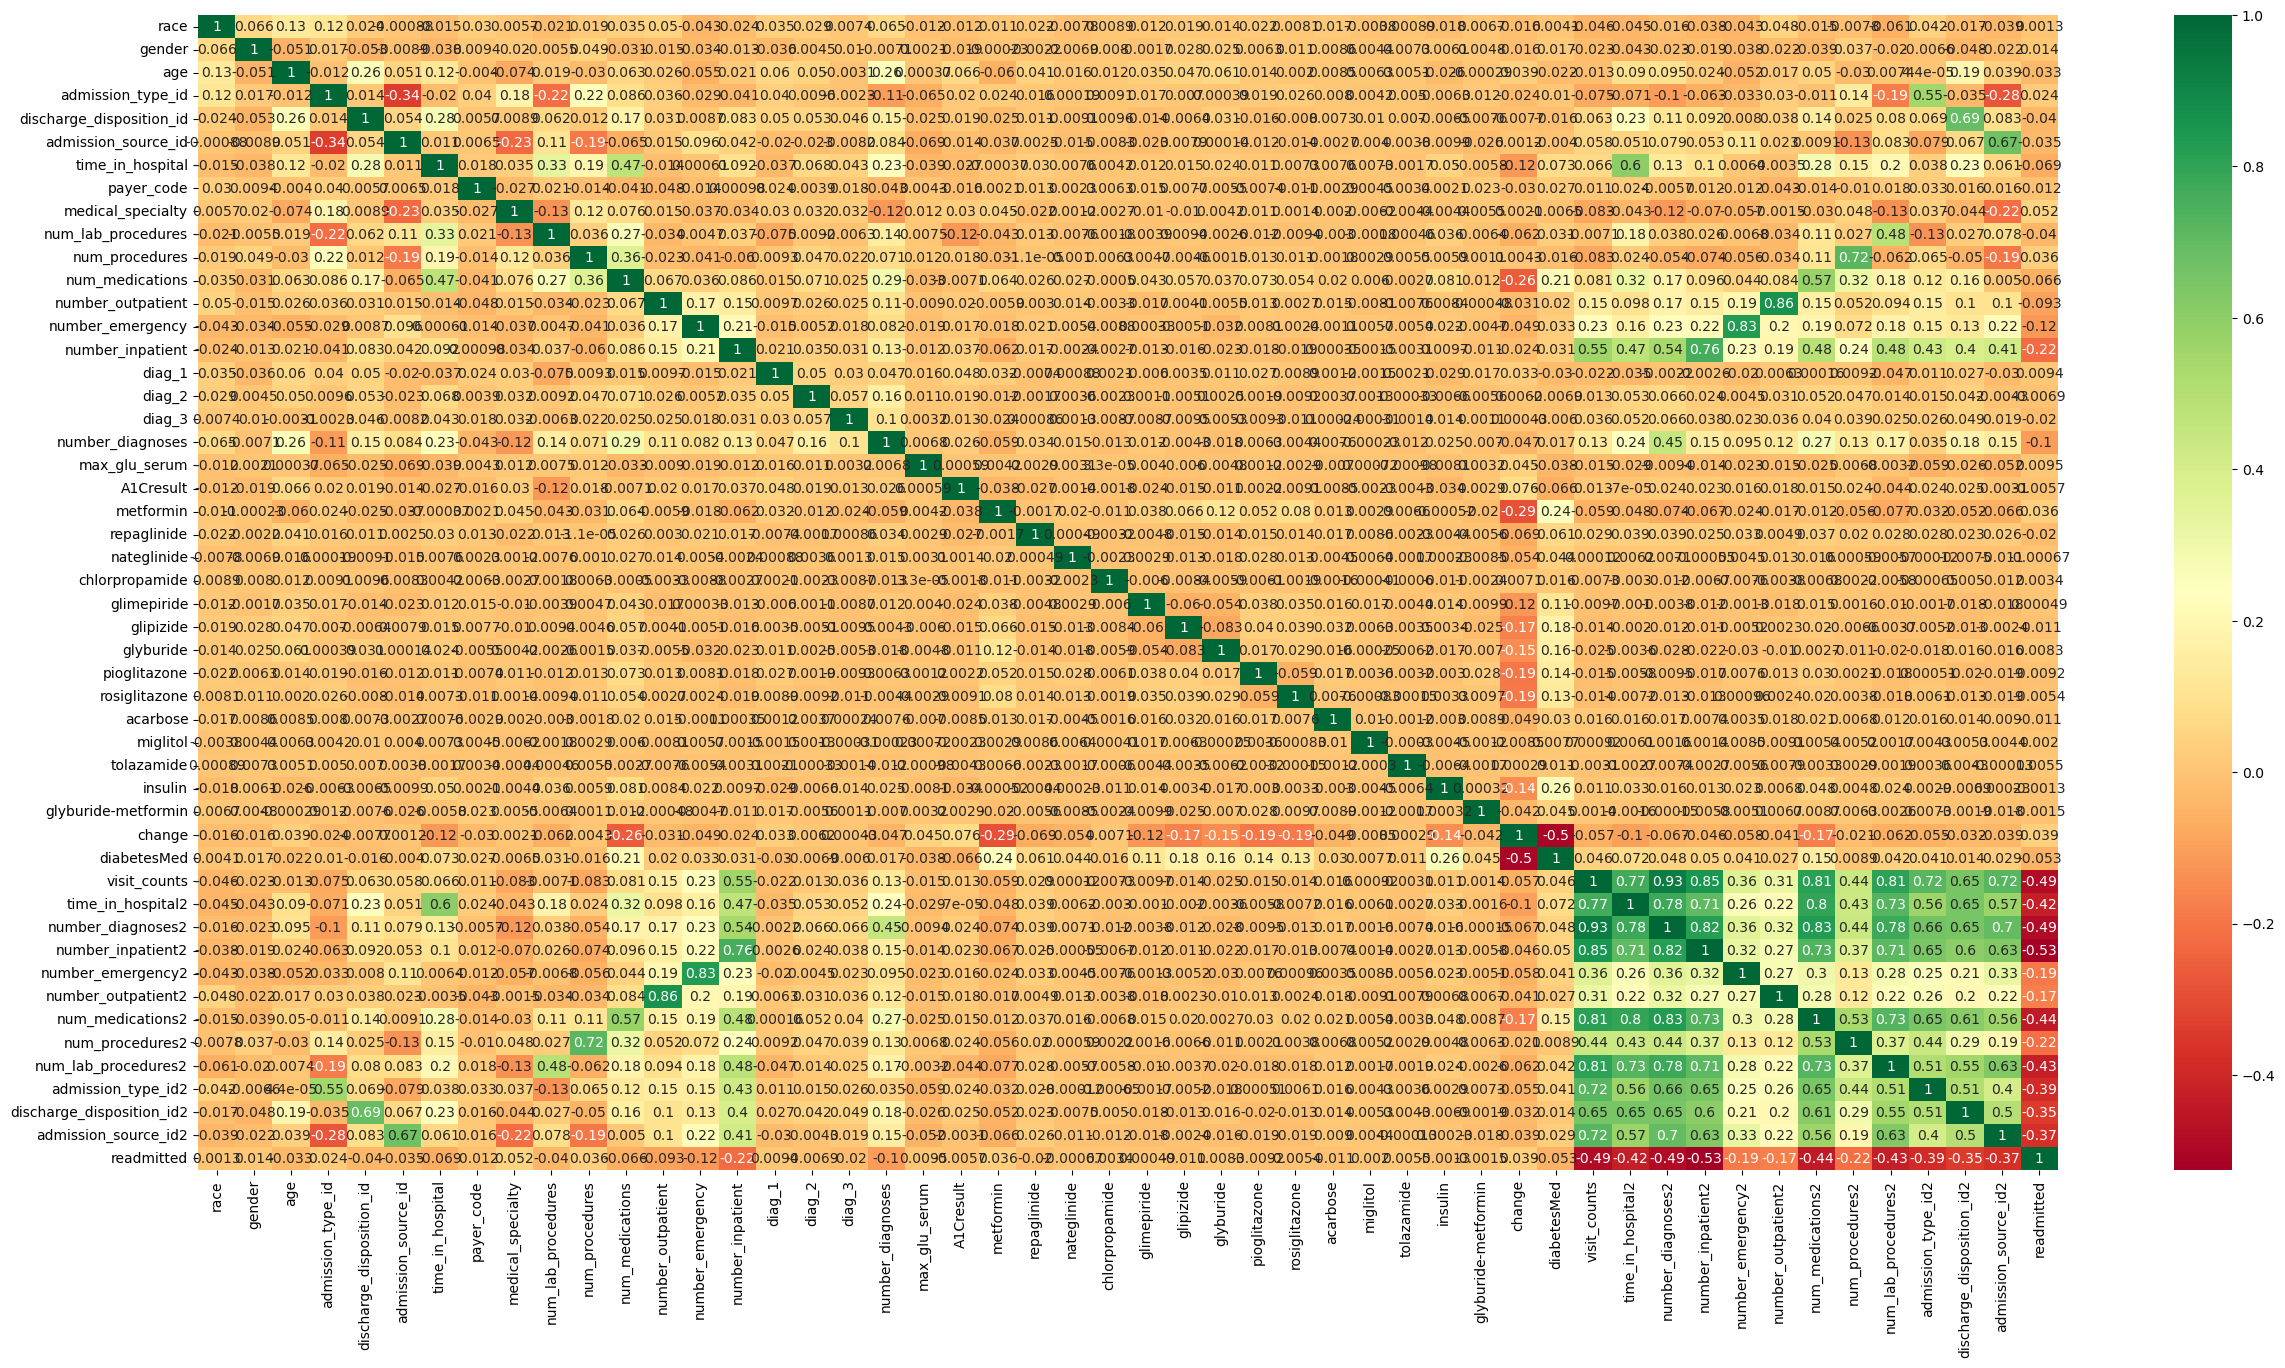

In [79]:
plt.figure(figsize=(30,15))
sns.heatmap(all_data.corr(), annot=True, cmap="RdYlGn")
plt.savefig('save_as_a_png.png')

In [80]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71235 entries, 0 to 71234
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   race                       71235 non-null  int64  
 1   gender                     71235 non-null  int64  
 2   age                        71235 non-null  int64  
 3   admission_type_id          71235 non-null  float64
 4   discharge_disposition_id   71235 non-null  float64
 5   admission_source_id        71235 non-null  float64
 6   time_in_hospital           71235 non-null  float64
 7   payer_code                 71235 non-null  int64  
 8   medical_specialty          71235 non-null  int64  
 9   num_lab_procedures         71235 non-null  float64
 10  num_procedures             71235 non-null  float64
 11  num_medications            71235 non-null  float64
 12  number_outpatient          71235 non-null  float64
 13  number_emergency           71235 non-null  flo

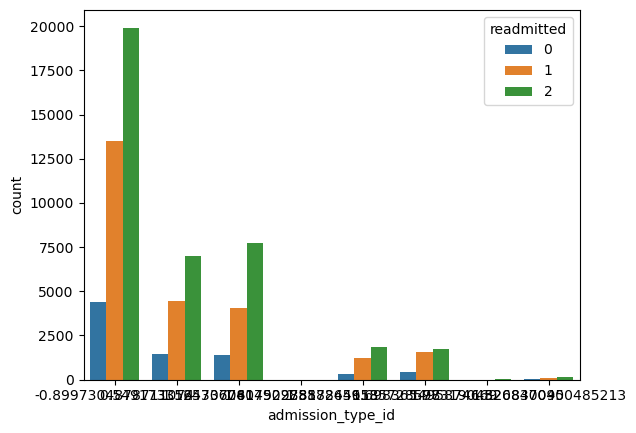

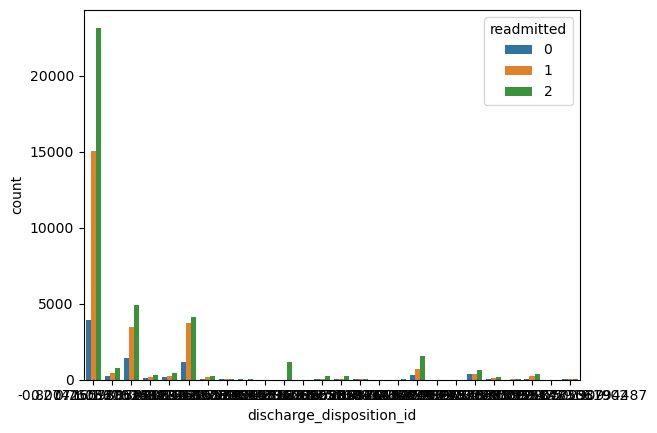

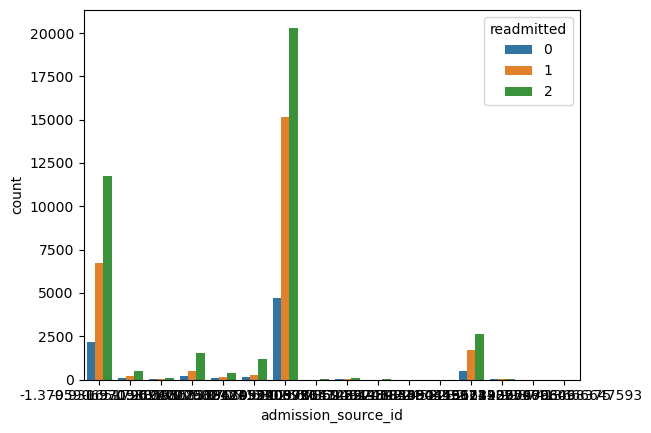

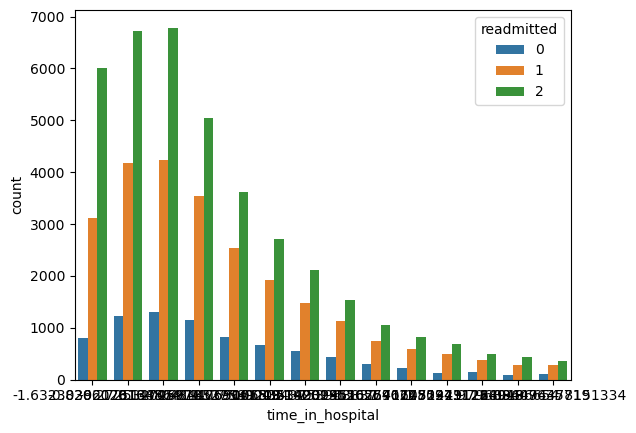

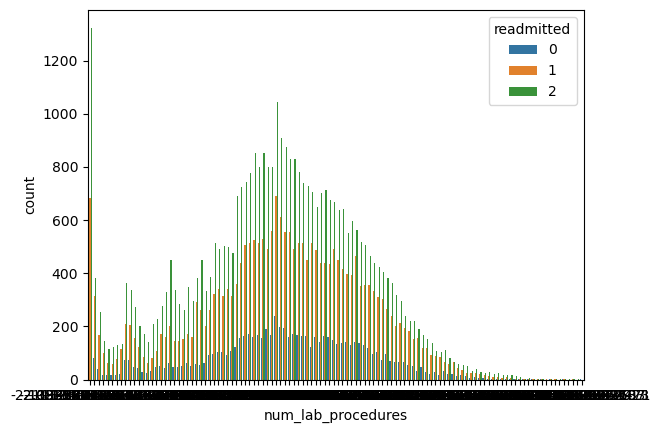

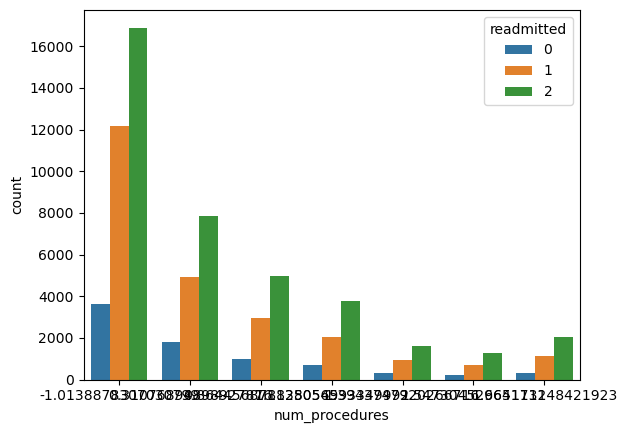

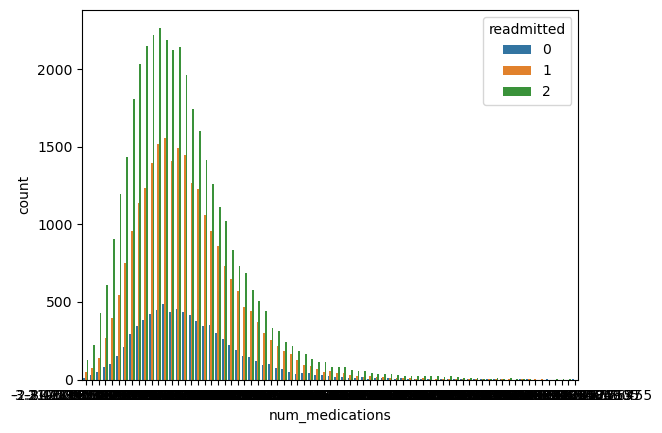

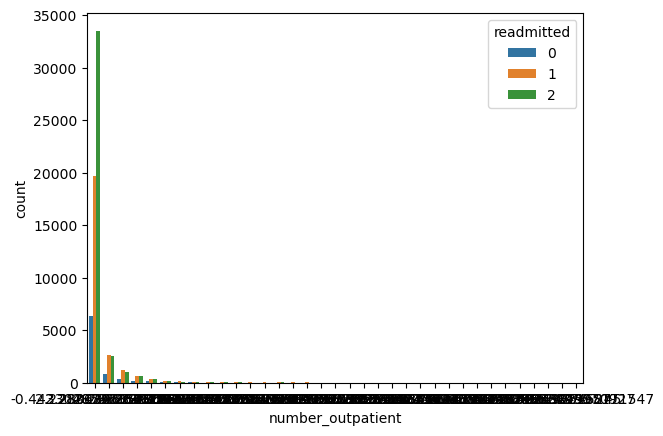

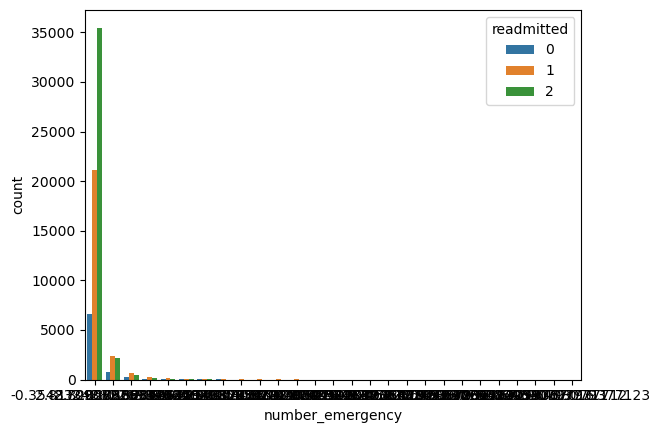

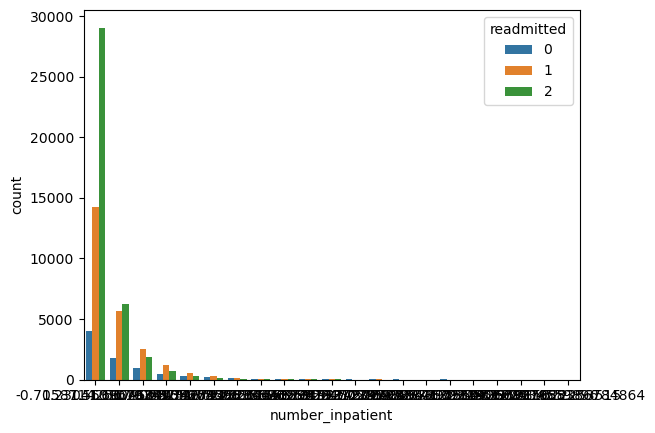

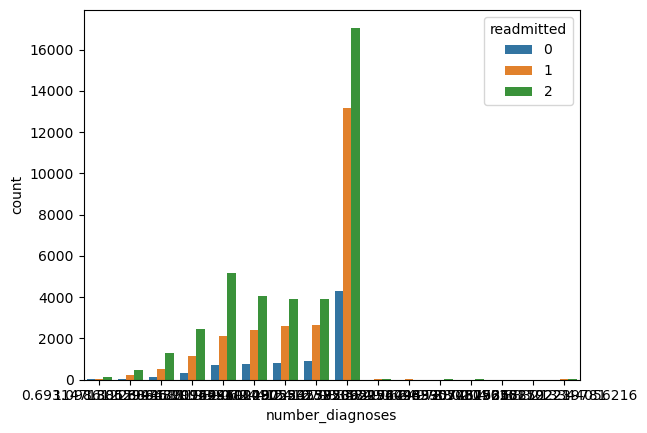

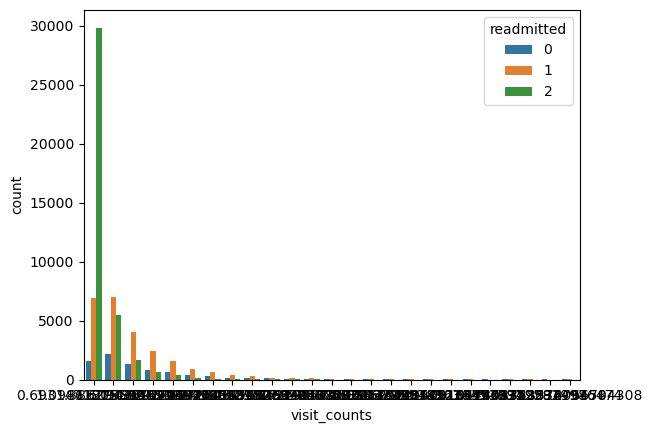

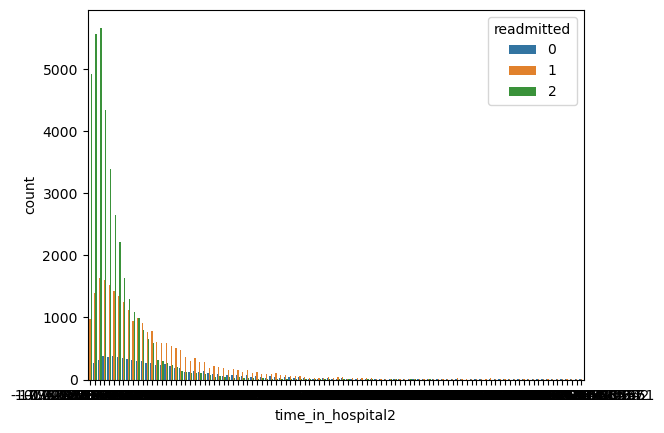

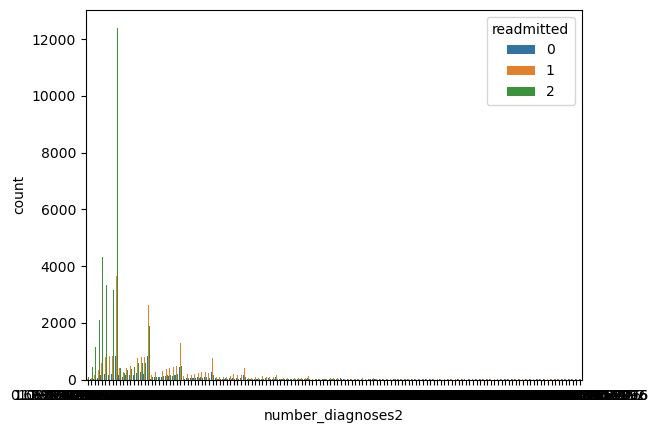

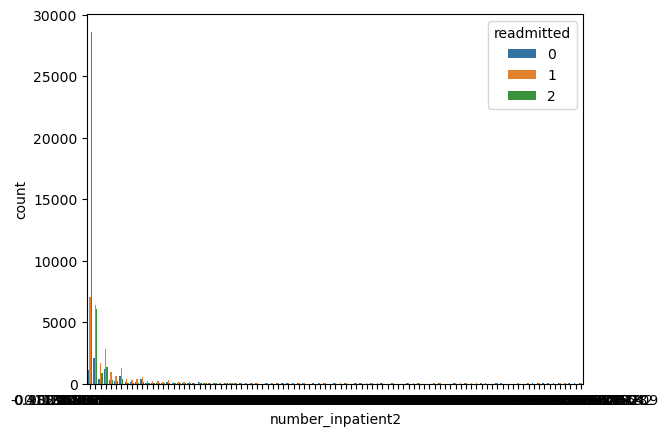

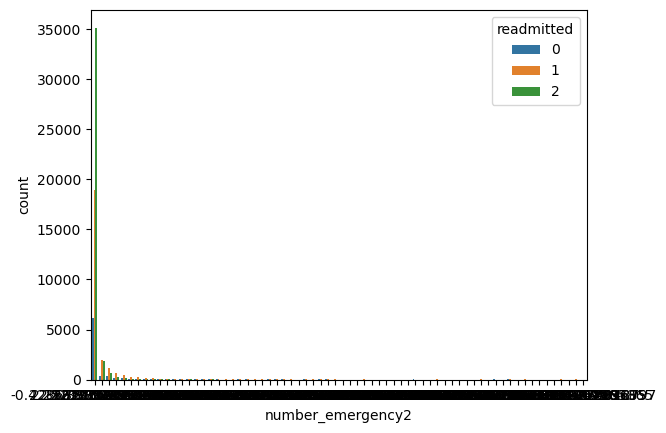

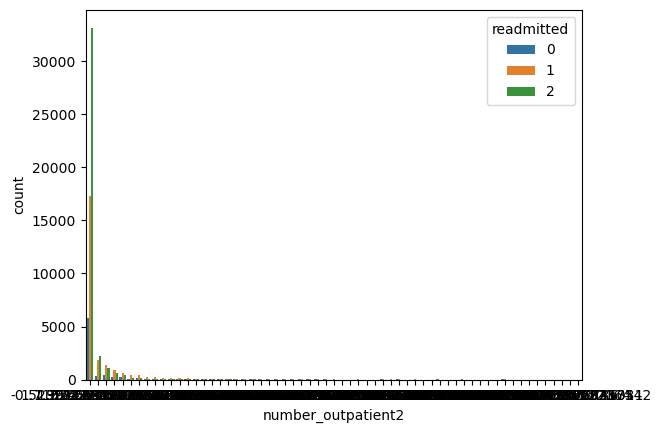

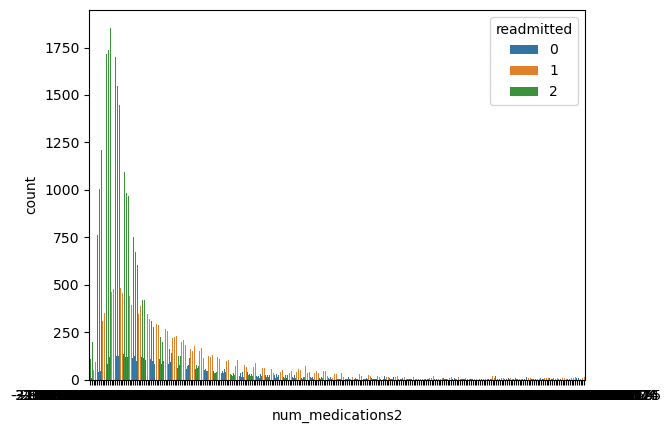

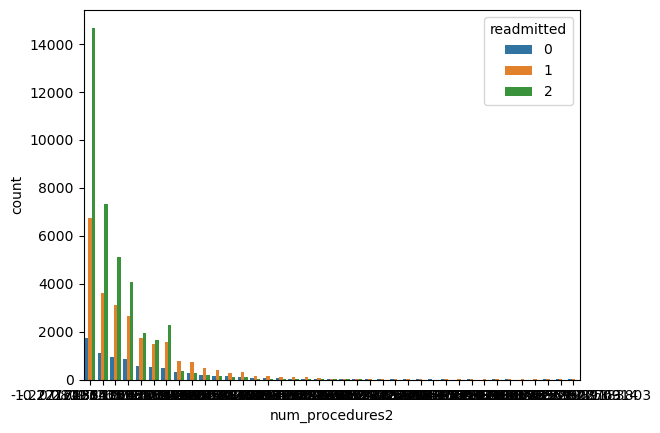

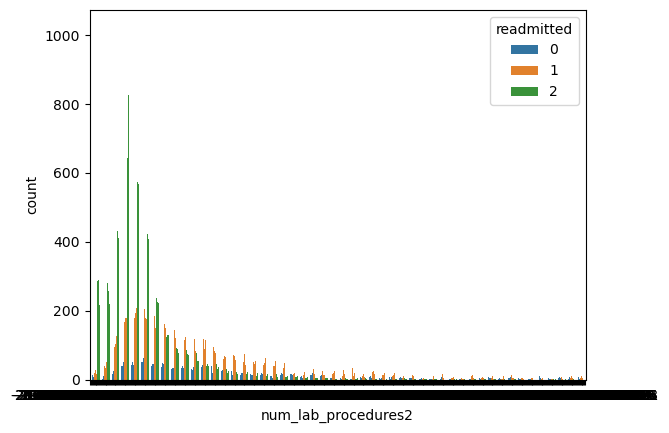

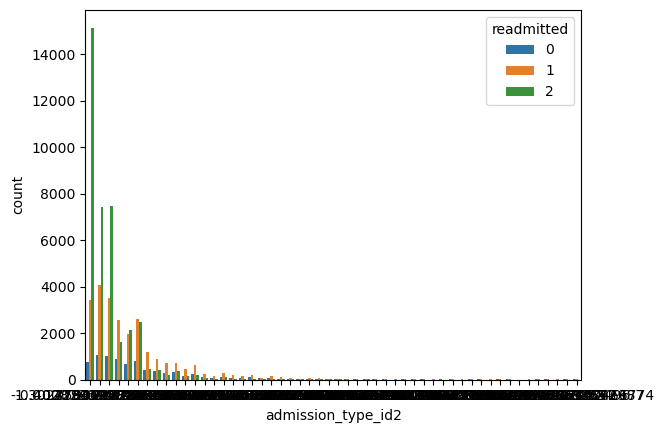

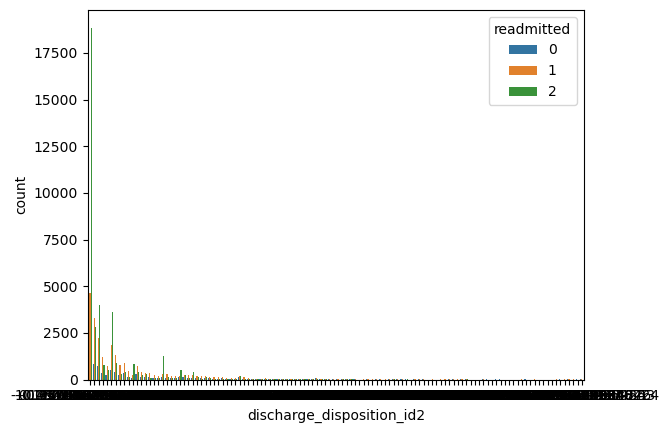

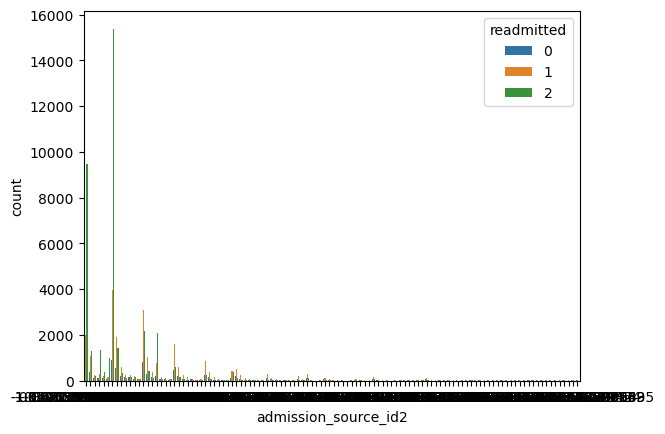

In [81]:
def plot_histogram(df,col):
    sns.countplot(data=df, x=col, hue='readmitted')
    plt.show()


for col in all_data[numeric_columns_enc]:
    plot_histogram(all_data, col)

In [82]:
pca_alldata=all_data.copy()

In [83]:
all_data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'tolazamide', 'insulin', 'glyburide-metformin', 'change',
       'diabetesMed', 'visit_counts', 'time_in_hospital2', 'number_diagnoses2',
       'number_inpatient2', 'number_emergency2', 'number_outpatient2',
       'num_medications2', 'num_procedures2', 'num_lab_procedures2',
       'admission_type_id2', 'discharge_disposition_id2',
       'admission_source_id2', 'readmitted'],
      dtype='object')

In [84]:
dtest=df_imputed.copy()

## Data Splitting

In [85]:
from sklearn.model_selection import train_test_split

train_df,val_df= train_test_split(all_data, test_size=0.05, random_state=7,stratify=lable) # Try adding `stratify` here

x_train = train_df.drop(columns='readmitted')
y_train = train_df['readmitted']
x_val = val_df.drop(columns='readmitted')
y_val = val_df['readmitted']


In [86]:
y_train.value_counts()

2    36484
1    23637
0     7552
Name: readmitted, dtype: int64

In [87]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 2.9869791666666665, 1: 0.9543371268209445, 2: 0.6182892957643533}

In [88]:
len(x_train), len(x_val), len(y_train), len(y_val)

(67673, 3562, 67673, 3562)

As pointed out eariler, I'll use 3 numerical features to train the classifier. **However, you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.** 

## Model Training

Let's train a model with the data! We'll train a Random Forest Classifier to demonstrate the process of making submissions. 

In [89]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier = classifier.fit(x_train, y_train)

Now let's test our classifier on the validation dataset and see the accuracy.

In [90]:
print("The accuracy of the classifier on the traing set is ", (classifier.score(x_train, y_train)))
print("The accuracy of the classifier on the validation set is ", (classifier.score(x_val, y_val)))

The accuracy of the classifier on the traing set is  0.9999704461158808
The accuracy of the classifier on the validation set is  0.7245929253228524


## Feature impportance

In [91]:
x_train.shape

(67673, 49)

In [92]:
def rf_feature_importance(m,df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feature_importance(classifier, x_train); fi[:15]

cols       imp
39          number_diagnoses2  0.076898
37               visit_counts  0.058605
14           number_inpatient  0.057214
40          number_inpatient2  0.054363
45        num_lab_procedures2  0.051801
43           num_medications2  0.047227
38          time_in_hospital2  0.042572
15                     diag_1  0.041848
17                     diag_3  0.041374
16                     diag_2  0.041267
9          num_lab_procedures  0.040905
11            num_medications  0.035919
8           medical_specialty  0.035427
48       admission_source_id2  0.032341
47  discharge_disposition_id2  0.025865

In [93]:
sel=fi[:15]['cols'].to_list()
sel

['number_diagnoses2',
 'visit_counts',
 'number_inpatient',
 'number_inpatient2',
 'num_lab_procedures2',
 'num_medications2',
 'time_in_hospital2',
 'diag_1',
 'diag_3',
 'diag_2',
 'num_lab_procedures',
 'num_medications',
 'medical_specialty',
 'admission_source_id2',
 'discharge_disposition_id2']

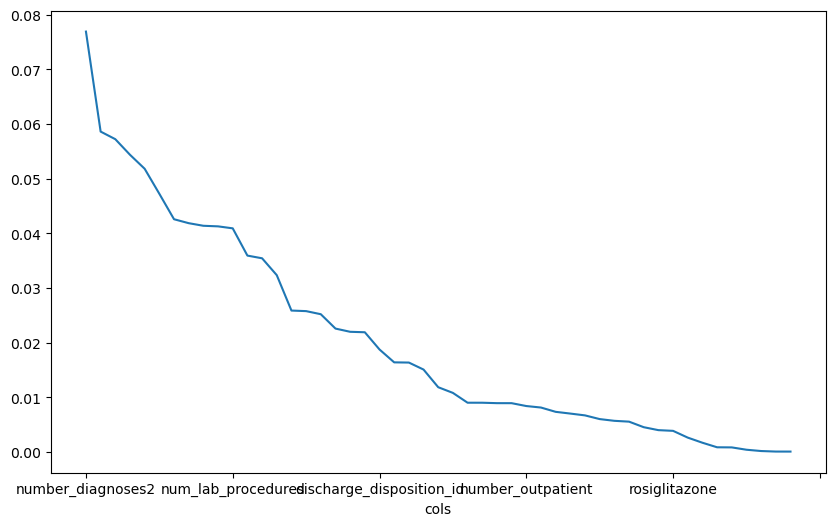

In [94]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

Well. This model is as good as a model that always predicts "NO". Can you verify that? 

In [95]:
x_t=x_train[sel]
v_t=x_val[sel]

In [96]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1,gamma=2.01,reg_lambda=1,reg_alpha=2,n_estimators=81)
xgb.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=81,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=2, ...)

In [97]:
print("The accuracy of the classifier on the validation set is ", (xgb.score(x_val, y_val)))

The accuracy of the classifier on the validation set is  0.735822571588995


In [98]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgB

In [99]:
def objective_function(learning_rate, n_estimators, max_depth, gamma, subsample, colsample_bytree):
    model = xgB.XGBClassifier(
        learning_rate=learning_rate,
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42,
        n_jobs=-1
    )

    model.fit(x_train,y_train)
    score = model.score(x_val, y_val)
    return score

In [100]:
# Define Parameter Space
pbounds = {
    'learning_rate': (0.01, 0.5),
    'n_estimators': (50, 500),
    'max_depth': (2, 10),
    'gamma': (0, 5),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.5, 1),
    
}

In [101]:
# Run Bayesian Optimization
optimizer = BayesianOptimization(
    f=objective_function,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=10, n_iter=20)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | 0.7313    | 0.6873    | 4.754     | 0.3687    | 6.789     | 120.2     | 0.578     |
| 2         | 0.7319    | 0.529     | 4.331     | 0.3045    | 7.665     | 59.26     | 0.985     |
| 3         | 0.7299    | 0.9162    | 1.062     | 0.09909   | 3.467     | 186.9     | 0.7624    |
| 4         | 0.7319    | 0.716     | 1.456     | 0.3098    | 3.116     | 181.5     | 0.6832    |
| 5         | 0.7302    | 0.728     | 3.926     | 0.1078    | 6.114     | 316.6     | 0.5232    |
| 6         | 0.7341    | 0.8038    | 0.8526    | 0.04188   | 9.591     | 484.5     | 0.9042    |
| 7         | 0.7322    | 0.6523    | 0.4884    | 0.3453    | 5.521     | 104.9     | 0.7476    |
| 8         | 0.7339    | 0.5172    | 4.547     | 0.1368    | 7.3       | 190.3     | 0.76      |
| 9         | 0.7055

In [102]:
# Retrieve Best Parameters
best_params = optimizer.max['params']
print(best_params)

{'colsample_bytree': 0.6737704894025403, 'gamma': 4.901041874687538, 'learning_rate': 0.32297887271080256, 'max_depth': 6.567014932969512, 'n_estimators': 104.6840524220309, 'subsample': 0.938429051698484}


In [103]:
# best_model_no = xgB.XGBClassifier(
#     learning_rate=0.20375939256080808,
#     n_estimators=int(316.2610014841137),
#     max_depth=int(3.6122147964948716),
#     gamma= 4.915478419911745,
#     subsample=0.854693592535084,
#     colsample_bytree=0.6739024143714775,
#     random_state=42,
#     n_jobs=-1
# )

# best_model_no.fit(x_train,y_train)

In [104]:
# print("The accuracy of the classifier on the validation set is ", (xgb.score(x_train, y_train)))

In [105]:
# print("The accuracy of the classifier on the validation set is ", (xgb.score(x_val, y_val)))

In [106]:
# print("The accuracy of the classifier on the validation set is ", (xgb.score(x_val, y_val))) #n_jobs=-1,gamma=2.5,reg_lambda=1,reg_alpha=2

In [107]:
# print("The accuracy of the classifier on the validation set is ", (xgb.score(x_val, y_val))) #n_jobs=-1,gamma=2.5,reg_lambda=0,reg_alpha=1

In [108]:
featuers.select_dtypes(include="object").columns

Index(['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'diag_1',
       'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'tolazamide', 'insulin', 'glyburide-metformin', 'change',
       'diabetesMed'],
      dtype='object')

In [109]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_jobs=-1,reg_lambda=1,reg_alpha=1,n_estimators=83,max_depth=6,
                         num_iterations=120,max_bin=430,objective='multiclass',importance_type='split'
                         ,num_class=3,is_unbalance=True)
clf.fit(x_train, y_train)

LGBMClassifier(is_unbalance=True, max_bin=430, max_depth=6, n_estimators=83,
               num_class=3, num_iterations=120, objective='multiclass',
               reg_alpha=1, reg_lambda=1)

In [110]:
print("The accuracy of the classifier on the validation set is ", (clf.score(x_val, y_val)))

The accuracy of the classifier on the validation set is  0.7355418304323413


In [111]:
y_pred_train = clf.predict(x_val)
print("The accuracy of the classifier on the validation set is ", (clf.score(x_train, y_train)))

The accuracy of the classifier on the validation set is  0.7582344509627178


In [112]:
from sklearn.metrics import classification_report ,f1_score
y_pred = clf.predict(x_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.11      0.18       398
           1       0.66      0.64      0.65      1244
           2       0.78      0.93      0.85      1920

    accuracy                           0.74      3562
   macro avg       0.66      0.56      0.56      3562
weighted avg       0.71      0.74      0.70      3562



In [113]:
classes =[]
labeles=np.unique(lable)
for v in labeles:
    classes.append('Class '+ str(v))
classes

['Class 0', 'Class 1', 'Class 2']

In [114]:
from sklearn.metrics import accuracy_score , recall_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_test_pred = clf.predict(x_val)
pred_accuracy_score = accuracy_score(y_val, y_test_pred)
pred_recall_score = recall_score(y_val, y_test_pred, average='macro')
print('Prediction accuracy', pred_accuracy_score,' recall ', pred_recall_score)

cnf_matrix = confusion_matrix(y_val, y_test_pred, labels=[0,1,2])
cnf_matrix

Prediction accuracy 0.7355418304323413  recall  0.5584109083735935


array([[  43,  269,   86],
       [  34,  795,  415],
       [   4,  134, 1782]])

In [115]:
class LGBMClassifier_GainFE(lgb.LGBMClassifier):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')

In [116]:
clf2 = LGBMClassifier_GainFE(n_jobs=-1,reg_lambda=1,reg_alpha=2,n_estimators=83,max_depth=6,
                         num_iterations=100,max_bin=430)

In [117]:
clf2.fit(x_train, y_train)

LGBMClassifier_GainFE(max_bin=430, max_depth=6, n_estimators=83,
                      num_iterations=100, reg_alpha=2, reg_lambda=1)

<AxesSubplot:>

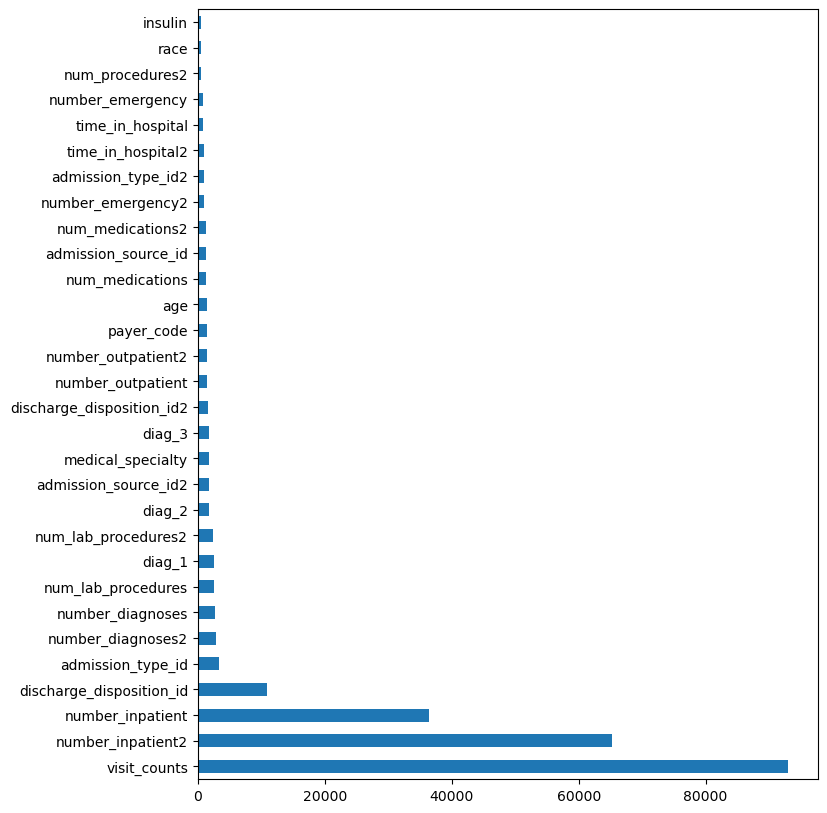

In [118]:
feat_imp = pd.Series(clf2.feature_importances_, index=x_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [119]:
from sklearn.metrics import classification_report
y_pred = clf.predict(x_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.11      0.18       398
           1       0.66      0.64      0.65      1244
           2       0.78      0.93      0.85      1920

    accuracy                           0.74      3562
   macro avg       0.66      0.56      0.56      3562
weighted avg       0.71      0.74      0.70      3562



## Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

In [120]:
# test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
# test_df.head()
f_test=test_df.copy()

Note that the test set has the same features and doesn't have the `readmitted` column.
At this stage one must **NOT** forget to apply the same processing done on the training set on the features of the test set.

Now we'll add `readmitted` column to the test `DataFrame` and add the values of the predicted class to it.

**I'll select the numerical features here as I did in the training set. DO NOT forget to change this step as you change the preprocessing of the training data.**

In [121]:
to_drop_features = ['encounter_id', 'patient_nbr','examide','citoglipton','acetohexamide','weight','tolbutamide','troglitazone','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','tolbutamide']
test_df.drop(columns=to_drop_features,inplace=True)


In [122]:
test_df.replace('?',np.NaN,inplace=True)

In [123]:
test_df.head()

race  gender      age  admission_type_id  \
0  AfricanAmerican  Female  [60-70)                  2   
1        Caucasian    Male  [80-90)                  2   
2              NaN  Female  [20-30)                  2   
3  AfricanAmerican  Female  [60-70)                  1   
4        Caucasian    Male  [60-70)                  2   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        22                    1                 4         MC   
1                        13                    1                 3         MC   
2                        18                    4                 4        NaN   
3                        22                    7                 7         MD   
4                        22                    1                 7        NaN   

        medical_specialty  num_lab_procedures  ...  number_diagnoses2  \
0        InternalMedicine                  46  ...                 26   
1                     NaN                  42  ...                  9   
2  Family/GeneralPractice                  71  ...                  9   
3                     NaN                  79  ...                  9   
4        Surgery-Vascular                  33  ...                 14   

   number_inpatient2  number_emergency2  number_outpatient2  num_medications2  \
0                  1                  1                   0                74   
1                  0                  0                   0                12   
2                  0                  0                   0                20   
3                  0                  0                   0                13   
4                  7                  0                   0                53   

  num_procedures2 num_lab_procedures2 admission_type_id2  \
0               6                 150                  4   
1               0                  42                  2   
2               3                  71                  2   
3               1                  79                  1   
4               5                  35                  5   

   discharge_disposition_id2 admission_source_id2  
0                         34                   15  
1                         13                    1  
2                         18                    4  
3                         22                    7  
4                         25                    2  

[5 rows x 49 columns]

In [124]:
test=test_df.copy() 

In [125]:
test["gender"].value_counts()

Female             16410
Male               14118
Unknown/Invalid        2
Name: gender, dtype: int64

In [126]:
test['gender'] = test['gender'].replace('Unknown/Invalid','Female')


In [127]:
test["gender"].value_counts()

Female    16412
Male      14118
Name: gender, dtype: int64

In [128]:
test['medical_specialty'].replace('Hematology','Hematology/Oncology',inplace=True)
len(test['medical_specialty'].unique())

64

In [129]:
test.race.value_counts()

Caucasian          22830
AfricanAmerican     5765
Hispanic             610
Other                452
Asian                192
Name: race, dtype: int64

In [130]:
feauters_encoder

LabelEncoder()

In [131]:
ecoder_list

[LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder()]

In [132]:
categorical_columns_enc[13]

'chlorpropamide'

In [133]:
mid=ecoder_list[5].classes_.tolist()
mid2=ecoder_list[6].classes_.tolist()
mid3=ecoder_list[7].classes_.tolist()

In [134]:
test2=test.copy() 

In [135]:
test=test2.copy() 

In [136]:
test['medical_specialty'] = test['medical_specialty'].replace('Proctology','InternalMedicine')
test['medical_specialty'] = test['medical_specialty'].replace('Psychiatry-Addictive','InternalMedicine')
# test['diag_1'] = test['diag_1'].replace('240','428')
# test['diag_1'] = test['diag_1'].replace('477','428')
# test['diag_1'] = test['diag_1'].replace('314','428')
# test['diag_1'] = test['diag_1'].replace('389','428')
# test['diag_1'] = test['diag_1'].replace('897','428')
# test['diag_1'] = test['diag_1'].replace('207','428')
# test['diag_1'] = test['diag_1'].replace('V07','428')
# test['diag_1'] = test['diag_1'].replace('363','428')
# test['diag_1'] = test['diag_1'].replace('870','428')
# test['diag_1'] = test['diag_1'].replace('602','428')
test['chlorpropamide'] = test['chlorpropamide'].replace('Down','No')
for l in test['diag_1']:
    if l not in mid:
        test['diag_1'] = test['diag_1'].replace(l,'428')

for l2 in test['diag_2']:
    if l2 not in mid2:
        test['diag_2'] = test['diag_2'].replace(l2,'428')

for l3 in test['diag_3']:
    if l3 not in mid3:
        test['diag_3'] = test['diag_3'].replace(l3,'250')

test[(test['chlorpropamide'] == "Down")]

Empty DataFrame
Columns: [race, gender, age, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, glipizide, glyburide, pioglitazone, rosiglitazone, acarbose, miglitol, tolazamide, insulin, glyburide-metformin, change, diabetesMed, visit_counts, time_in_hospital2, number_diagnoses2, number_inpatient2, number_emergency2, number_outpatient2, num_medications2, num_procedures2, num_lab_procedures2, admission_type_id2, discharge_disposition_id2, admission_source_id2]
Index: []

[0 rows x 49 columns]

In [137]:
categorical_columns_enc

['race',
 'gender',
 'age',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'change',
 'diabetesMed']

In [138]:
test.miglitol.value_counts()

No        30520
Steady        8
Down          1
Up            1
Name: miglitol, dtype: int64

In [139]:
test[test.miglitol=='Down']

race gender      age  admission_type_id  discharge_disposition_id  \
3204  Caucasian   Male  [80-90)                  1                         6   

      admission_source_id  time_in_hospital payer_code medical_specialty  \
3204                    7                 3         MC               NaN   

      num_lab_procedures  ...  number_diagnoses2  number_inpatient2  \
3204                  11  ...                 54                 20   

      number_emergency2  number_outpatient2  num_medications2 num_procedures2  \
3204                  0                  16               105               8   

     num_lab_procedures2 admission_type_id2  discharge_disposition_id2  \
3204                 305                 11                         61   

     admission_source_id2  
3204                   37  

[1 rows x 49 columns]

In [140]:
test['medical_specialty'] = test['medical_specialty'].replace('Pediatrics-AllergyandImmunology','InternalMedicine')
test['medical_specialty'] = test['medical_specialty'].replace('Resident','InternalMedicine')
test['miglitol'] = test['miglitol'].replace('Down','No')


In [141]:
i=0
for col in categorical_columns_enc:
    print(i)
    test[col][test[col].notnull()]= ecoder_list[i].transform(test[col][test[col].notnull()])
    i+=1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [142]:
test.head()

race gender age  admission_type_id  discharge_disposition_id  \
0    0      0   6                  2                        22   
1    2      1   8                  2                        13   
2  NaN      0   2                  2                        18   
3    0      0   6                  1                        22   
4    2      1   6                  2                        22   

   admission_source_id  time_in_hospital payer_code medical_specialty  \
0                    1                 4          7                17   
1                    1                 3          7               NaN   
2                    4                 4        NaN                11   
3                    7                 7          8               NaN   
4                    1                 7        NaN                66   

   num_lab_procedures  ...  number_diagnoses2  number_inpatient2  \
0                  46  ...                 26                  1   
1                  42  ...                  9                  0   
2                  71  ...                  9                  0   
3                  79  ...                  9                  0   
4                  33  ...                 14                  7   

   number_emergency2  number_outpatient2  num_medications2 num_procedures2  \
0                  1                   0                74               6   
1                  0                   0                12               0   
2                  0                   0                20               3   
3                  0                   0                13               1   
4                  0                   0                53               5   

  num_lab_procedures2 admission_type_id2  discharge_disposition_id2  \
0                 150                  4                         34   
1                  42                  2                         13   
2                  71                  2                         18   
3                  79                  1                         22   
4                  35                  5                         25   

  admission_source_id2  
0                   15  
1                    1  
2                    4  
3                    7  
4                    2  

[5 rows x 49 columns]

In [143]:
# test['service'] = test['number_outpatient'] + test['number_emergency'] + test['number_inpatient']

In [144]:
# test.drop(columns=['number_outpatient','number_emergency','number_inpatient'],inplace=True)

In [145]:
# test_imputed=test.copy()
# test_imputed.fillna(df_imputed.mode().iloc[0],inplace=True)

In [146]:
test_imputed = pd.DataFrame(imputer.transform(test), columns=test.columns)


In [147]:
for i in test_imputed.columns : 
    test_imputed[i] = round(test_imputed[i]).astype('int')
    


In [148]:
test_imputed.head()

race  gender  age  admission_type_id  discharge_disposition_id  \
0     0       0    6                  2                        22   
1     2       1    8                  2                        13   
2     2       0    2                  2                        18   
3     0       0    6                  1                        22   
4     2       1    6                  2                        22   

   admission_source_id  time_in_hospital  payer_code  medical_specialty  \
0                    1                 4           7                 17   
1                    1                 3           7                 37   
2                    4                 4           6                 11   
3                    7                 7           8                 14   
4                    1                 7           7                 66   

   num_lab_procedures  ...  number_diagnoses2  number_inpatient2  \
0                  46  ...                 26                  1   
1                  42  ...                  9                  0   
2                  71  ...                  9                  0   
3                  79  ...                  9                  0   
4                  33  ...                 14                  7   

   number_emergency2  number_outpatient2  num_medications2  num_procedures2  \
0                  1                   0                74                6   
1                  0                   0                12                0   
2                  0                   0                20                3   
3                  0                   0                13                1   
4                  0                   0                53                5   

   num_lab_procedures2  admission_type_id2  discharge_disposition_id2  \
0                  150                   4                         34   
1                   42                   2                         13   
2                   71                   2                         18   
3                   79                   1                         22   
4                   35                   5                         25   

   admission_source_id2  
0                    15  
1                     1  
2                     4  
3                     7  
4                     2  

[5 rows x 49 columns]

In [149]:
dfpt=test_imputed[['number_diagnoses',
 'visit_counts','number_diagnoses2']]

dfft=test_imputed[['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
   'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'time_in_hospital',
'time_in_hospital2',
 'number_inpatient2',
 'number_emergency2',
 'number_outpatient2',
 'num_medications2',
 'num_procedures2',
 'num_lab_procedures2',
 'admission_type_id2',
 'discharge_disposition_id2',
 'admission_source_id2'  ]]



In [150]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(dfft)
dt=pt.transform(dfft)
dt=pd.DataFrame(dt,columns=['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
   'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'time_in_hospital',
'time_in_hospital2',
 'number_inpatient2',
 'number_emergency2',
 'number_outpatient2',
 'num_medications2',
 'num_procedures2',
 'num_lab_procedures2',
 'admission_type_id2',
 'discharge_disposition_id2',
 'admission_source_id2'  ])

In [151]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)
dt2=transformer.transform(dfpt)
dt2=pd.DataFrame(dt2,columns=['number_diagnoses',
 'visit_counts','number_diagnoses2'])


In [152]:
test_imputed[['number_diagnoses',
 'visit_counts','number_diagnoses2']]=dt2
test_imputed[['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
   'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'time_in_hospital',
'time_in_hospital2',
 'number_inpatient2',
 'number_emergency2',
 'number_outpatient2',
 'num_medications2',
 'num_procedures2',
 'num_lab_procedures2',
 'admission_type_id2',
 'discharge_disposition_id2',
 'admission_source_id2']]=dt


In [153]:
# X_test = test_df.drop(columns=to_drop_features[:2])

# # You should update/remove the next line once you change the features used for training
# X_test = X_test[selected_features]

y_test_predicted = xgb.predict(test_imputed)
y=label_encoder.inverse_transform(y_test_predicted)
y

array(['>30', 'NO', 'NO', ..., 'NO', 'NO', 'NO'], dtype=object)

In [154]:

f_test['readmitted'] = y

f_test.head()

encounter_id  patient_nbr             race  gender      age weight  \
0     109962834     23779836  AfricanAmerican  Female  [60-70)      ?   
1     240829854     32387580        Caucasian    Male  [80-90)      ?   
2      44942994     19436418                ?  Female  [20-30)      ?   
3     302469824    142233539  AfricanAmerican  Female  [60-70)      ?   
4     172075704     79818876        Caucasian    Male  [60-70)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  2                        22                    1   
1                  2                        13                    1   
2                  2                        18                    4   
3                  1                        22                    7   
4                  2                        22                    1   

   time_in_hospital  ... number_inpatient2 number_emergency2  \
0                 4  ...                 1                 1   
1                 3  ...                 0                 0   
2                 4  ...                 0                 0   
3                 7  ...                 0                 0   
4                 7  ...                 7                 0   

   number_outpatient2  num_medications2  num_procedures2  num_lab_procedures2  \
0                   0                74                6                  150   
1                   0                12                0                   42   
2                   0                20                3                   71   
3                   0                13                1                   79   
4                   0                53                5                   35   

   admission_type_id2  discharge_disposition_id2 admission_source_id2  \
0                   4                         34                   15   
1                   2                         13                    1   
2                   2                         18                    4   
3                   1                         22                    7   
4                   5                         25                    2   

  readmitted  
0        >30  
1         NO  
2         NO  
3         NO  
4        <30  

[5 rows x 62 columns]

Now we're ready to generate the submission file. The submission file needs the columns `encounter_id` and `readmitted` only.

In [155]:
f_test[['encounter_id', 'readmitted']]

encounter_id readmitted
0         109962834        >30
1         240829854         NO
2          44942994         NO
3         302469824         NO
4         172075704        <30
...             ...        ...
30525     160817292        >30
30526     296022602        >30
30527     156232536         NO
30528     407964242         NO
30529     110113794         NO

[30530 rows x 2 columns]

In [156]:
f_test[['encounter_id', 'readmitted']].to_csv('/kaggle/working/submissions.csv', index=False)

The remaining steps is to submit the generated file and are as follows. 

1. Press `Save Version` on the upper right corner of this notebook.
2. Write a `Version Name` of your choice and choose `Save & Run All (Commit)` then click `Save`.
3. Wait for the saved notebook to finish running the go to the saved notebook.
4. Under the title of your notebook you'll find multiple tabs (notebook, data, logs, comments). Select `Data` tab. 
4. Select the `submission.csv` file and click `Submit`.

Now your submission will be evaluated and your score will be updated on the leaderboard! CONGRATULATIONS!!

## Conclusion

In this notebook, we have demonstrated the essential steps that one should do in order to get "slightly" familiar with the data and the submission process. We chose not to go into details in each step to keep the welcoming notebook simple and make a room for improvement.

You're encourged to `Fork` the notebook, edit it, add your insights and use it to create your submission.